# AIRLINE DELAY ANALYSIS

Proje kapsamında kullanılacak veri seti Kaggle’dan temin edilmiştir: 

Veri seti için: 
__[airline_delay_analysis](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay)__

Veri setine ait detaylar "Data Dictionary " başlığı altında verilmiştir.

Proje doğrultusunda, 3 farklı yöntem kullanılmış ve attributelar göz önüne alınarak bir uçuşta gecikme yaşanıp yaşanmayacağı öngörülmeye çalışılmıştır. Kullanılan yöntemler:
    * Lojistik Regresyon
    * Karar Ağaçları
    * Ensemble learning
            (- stacking
            - bagging
            - max voting yaklaşımları)



## DATA DICTIONARY 


Veri seti 539 383 instancedan ve 9 featuredan oluşmaktadır. 

Tanımlı featurelar ve özellikleri  
* id: Her instance için verilmiş unique identifer numarasıdır. 
* Airline – Uçuş gerçekleştiren havayolu şirketlerinin isimlerinin IATA standartlarına göre kısaltmalarını göstermektedir.
* Flight – Kullanılan uçak türünü göstermektedir.
* AirportFrom – Kalkış havalimanı isminin IATA standartlarına göre kısaltmalarını göstermektedir.
* AirportTo – Destinasyon havalimanı isminin IATA standartlarına göre kısaltmalarını göstermektedir.
* DayOfWeek – Uçuşun gerçekleştirildiği günü ifade etmektedir. 
* Time – Uçuşun gerçekleştirildiği zamanı göstermektedir.  Veriler dakika cinsindendir.
* Length – Uçuş uzunluğunu göstermekte olup mil cinsinden değerler içermektedir. 
* Delay – Uçuşta bir gecikme yaşanıp yaşanmadığı göstermektedir. Şayet gecikme yaşandıysa 1; yaşanmadıysa 0 değerini almaktadır. 


## VERİ SETİ HAZIRLAMA

In [1]:
open('Airlines.csv').readline()

'id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay\n'

In [2]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import offline
import scipy
from scipy import stats
from plotly import graph_objs as go
%pip install scikit-learn
%pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

You should consider upgrading via the '/Users/tugbadanaci/Desktop/venv/bin/Python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/tugbadanaci/Desktop/venv/bin/Python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('Airlines.csv', index_col='id')
data.head()

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
id                                                                      
1       CO     269         SFO       IAH          3    15     205      1
2       US    1558         PHX       CLT          3    15     222      1
3       AA    2400         LAX       DFW          3    20     165      1
4       AA    2466         SFO       DFW          3    20     195      1
5       AS     108         ANC       SEA          3    30     202      0

In [4]:
data.shape

(539383, 8)

Görüldüğü üzere elimizdeki veri setinde 539383 instance bulunmaktadır ve bu instanceslar için 8 feature tanımlanmıştır.
 "id" feature, index olarak kullanılmıştır. 

In [5]:
# Instancelar için değer girilmeyen feature var mı? 
data.isna().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

Şayet veri girilmemiş hücreler olsaydı data.isna() komudu ile ilgili satırlar bulabilir 

Ayrıca data.fillna(method="", inplace=True) ile seçilen metoda göre boş hücreler doldurulabilr. 

In [6]:
# Featurelar için girilen veri türleri nelerdir? 
data.dtypes

Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

Çıktıdan da görüldüğü üzere bazı sütunlar için veri türlerinin uygun veri türüne değiştirilmesi gerekmektedir:
* "Flight" feature için veriler int64 türünden string türüne değiştirilmelidir.
* "DayofWeek" feature için veriler int64 türünden  türüne değiştirilmelidir.
* "Delay" feature için veriler int64 türünden object türüne değiştirilmelidir.

In [7]:
data["Flight"]= data["Flight"].map(str)
data["DayOfWeek"].replace([1,2,3,4,5,6,7], ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],inplace=True)
data["Delay"].replace([0,1],["Not Delayed","Delayed"], inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539383 entries, 1 to 539383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  object
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  object
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  object
dtypes: int64(2), object(6)
memory usage: 37.0+ MB


Airline Flight AirportFrom AirportTo  DayOfWeek  Time  Length        Delay
id                                                                           
1       CO    269         SFO       IAH  Wednesday    15     205      Delayed
2       US   1558         PHX       CLT  Wednesday    15     222      Delayed
3       AA   2400         LAX       DFW  Wednesday    20     165      Delayed
4       AA   2466         SFO       DFW  Wednesday    20     195      Delayed
5       AS    108         ANC       SEA  Wednesday    30     202  Not Delayed

Veri seti üzerinde yapılması gereken bir diğer işlem ise integer olan "Time" feature değerlerinin zaman formatına çevrilmesidir. Fakat yorumlama için bu değerler saat aralıklarına çevrilmiştir.  

In [8]:
cut_edges=[i*60 for i in np.arange(0, 25, 1).tolist()]
labels=["0-1AM","1-2AM","2-3AM","3-4AM","4-5AM","4-6AM","6-7AM","7-8AM","8-9AM","9-10AM","10-11AM","11-12AM","0-1PM","1-2PM","2-3PM","3-4PM","4-5PM","4-6PM","6-7PM","7-8PM","8-9PM","9-10PM","10-11PM","11-12PM"]
data["Time"] = pd.cut(data["Time"], bins=cut_edges, labels = labels)
data.head()

Airline Flight AirportFrom AirportTo  DayOfWeek   Time  Length        Delay
id                                                                            
1       CO    269         SFO       IAH  Wednesday  0-1AM     205      Delayed
2       US   1558         PHX       CLT  Wednesday  0-1AM     222      Delayed
3       AA   2400         LAX       DFW  Wednesday  0-1AM     165      Delayed
4       AA   2466         SFO       DFW  Wednesday  0-1AM     195      Delayed
5       AS    108         ANC       SEA  Wednesday  0-1AM     202  Not Delayed

Veri seti üzerinde yapılması gereken bir diğer işlem ise integer olan "Length" feature değerleri için kategorik değişken oluşturmkatır.

In [9]:
# Diğer bir işlem ise "Length" attribute için kategoriler oluşturmak..
# Oluşturulacak bin sayısı için Sturge's Rule (1+3.322 logN) uygulanmıştır ve bu doğrultuda 44 kategori oluşturulmuştur. 
data["Grouped_Length"]=pd.qcut(data["Length"], round(np.log(539383)*3.322+1), precision=1, duplicates="drop")
data.head()

Airline Flight AirportFrom AirportTo  DayOfWeek   Time  Length  \
id                                                                  
1       CO    269         SFO       IAH  Wednesday  0-1AM     205   
2       US   1558         PHX       CLT  Wednesday  0-1AM     222   
3       AA   2400         LAX       DFW  Wednesday  0-1AM     165   
4       AA   2466         SFO       DFW  Wednesday  0-1AM     195   
5       AS    108         ANC       SEA  Wednesday  0-1AM     202   

          Delay  Grouped_Length  
id                               
1       Delayed  (204.0, 218.0]  
2       Delayed  (218.0, 238.0]  
3       Delayed  (164.0, 169.0]  
4       Delayed  (190.0, 204.0]  
5   Not Delayed  (190.0, 204.0]

## VERİ SETİ ANALİZİ

Veri seti incelenirken feature bazlı çalışılmıştır. 

### AIRLINE FEATURE

In [10]:
# Bu veri setinde hangi havayollarına adet uçuş bilgileri yer almaktadır? 
# Toplam kaç farklı havayoluna ait veri bulunmaktadır? 
unique_airlines=data["Airline"].unique()
print("Airlines names in the dataset:",str(unique_airlines) )
print("Total number of airlines in the dataset=", len(unique_airlines))

Airlines names in the dataset: ['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']
Total number of airlines in the dataset= 18


In [11]:
# Her bir havayolu toplam kaç adet uçuş gerçekleştirmiştir? 
# Gerçekleştirilen uçuş miktarı tüm uçuşların % kaçını oluşturmaktadır? 
total_flights_by_airlines=pd.DataFrame(data["Airline"].value_counts()).reset_index().rename(columns={"index":"Airline","Airline":"Total_flight"})
total_flights_by_airlines["Flight_percentage"]=total_flights_by_airlines.Total_flight/total_flights_by_airlines.Total_flight.sum()
total_flights_by_airlines.set_index("Airline", inplace=True)
total_flights_by_airlines.head()

Total_flight  Flight_percentage
Airline                                 
WN              94097           0.174453
DL              60940           0.112981
OO              50254           0.093169
AA              45656           0.084645
MQ              36605           0.067865

En fazla uçuş 94097 adet ile WN yani "South West Airlines" tarafından; en az uçuş ise 5578 adet ile HA yani "Hawain Airlines" tarafından gerçekleştirilmiştir. "South West Airlines" tarafından gerçekleştirilen uçuş miktarı tüm uçuşların % 17.44'üdür.

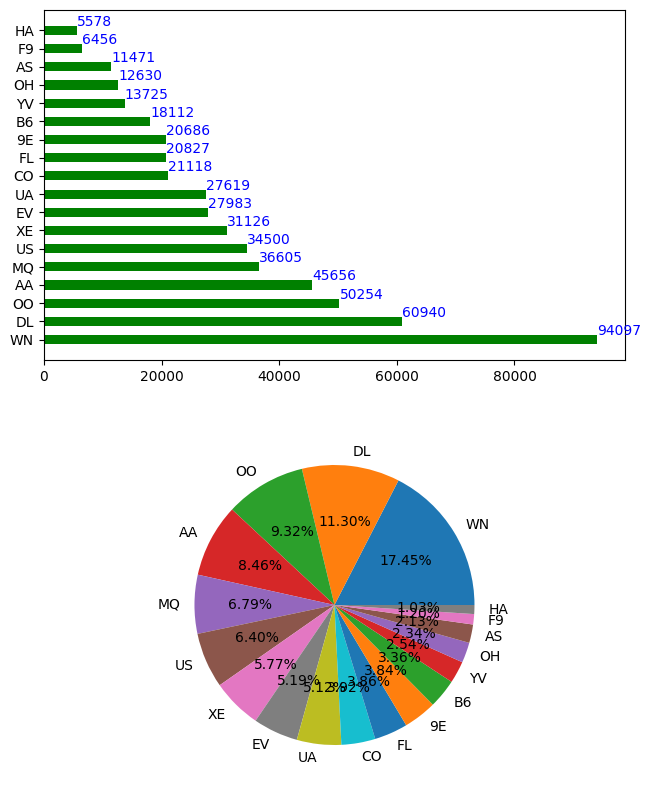

In [12]:
# Havayolu şirketleri tarafından gerçekleştirilen toplam uçuş sayısı ve yüzdelerinin grafikleştirilmesi
plt.rcParams["figure.figsize"]=(7.5,10) # default values for width and height of the plot in inches is 6.4 and 4.8 respectively
fig, (ax1,ax2) = plt.subplots(2,1)
width =0.5
ax1.barh(total_flights_by_airlines.index,total_flights_by_airlines["Total_flight"], width, color = "green")
ax2=data["Airline"].value_counts().plot(kind='pie', y='Airline',autopct='%1.02f%%', ylabel="")
for i, v in enumerate(total_flights_by_airlines["Total_flight"]):
    ax1.text(v + 3, i + .25, str(v),color = 'blue', ha="left")
plt.show()

In [13]:
# Havayolu şirketlerinin gerçekleştirdikleri uçuşlara yönelik istatistiksel veriler nelerdir? 
total_flights_by_airlines["Total_flight"].describe()

count       18.000000
mean     29965.722222
std      22026.299042
min       5578.000000
25%      14821.750000
50%      24368.500000
75%      36078.750000
max      94097.000000
Name: Total_flight, dtype: float64

Havayolu şirketlerinin gerçekleştirmiş olduğu toplam uçuş sayısı incelendiğinde; uçuş ortalamasının yaklaşık olarak 29.965;
 standart sapmanın ise yaklaşık olarak 22.026 olduğu görülmektedir. 

In [14]:
# Veri setinin outliers değerlerini bulabilmek için "remove_outlier" isimli fonksiyon tanımlanmıştır. 
# Tanımlanan fonksiyonda; verisetindeki hiç bir değerin 0'dan küçük olamaycağı dikkate alınarak dışa düşen alt sınırı hesaplanmıştır. 
def remove_outlier(dataframe, col_name):
    q1 = dataframe[col_name].quantile(0.25)
    q3 = dataframe[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low = max(0, q1-1.5*iqr)
    fence_high= q3 + 1.5*iqr
    print("old shape", dataframe.shape)
    print("old mean:", dataframe[col_name].mean())
    print("fence_low:", fence_low)
    print("fence_high:", fence_high)
    print("indexes removed because of low outliers:", dataframe.loc[dataframe[(dataframe[col_name]<=fence_low)].index.tolist(), col_name])
    print("indexes removed because of high outliers:", dataframe.loc[dataframe[(dataframe[col_name]>=fence_high)].index.tolist(), col_name])
    dataframe=dataframe[(dataframe[col_name]>fence_low) & (dataframe[col_name]<fence_high)]
    print("new shape", dataframe.shape)
    print("new mean:", dataframe[col_name].mean())
    return 

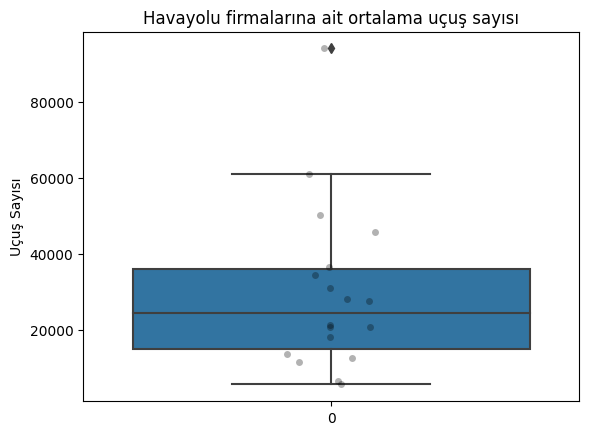

old shape (18, 2)
old mean: 29965.722222222223
fence_low: 0
fence_high: 67964.25
indexes removed because of low outliers: Series([], Name: Total_flight, dtype: int64)
indexes removed because of high outliers: Airline
WN    94097
Name: Total_flight, dtype: int64
new shape (17, 2)
new mean: 26193.29411764706


In [15]:
# Havayolu bazlı ortalama uçuş rakamlarında dışa düşen havayolu şirketleri hangisidir? 
# Outlier havayolu çıkarıldığı zaman uçuş ortalaması kaç olmaktadır? 
plt.rcParams["figure.figsize"]=(6.4,4.8)
box_plot0= sns.boxplot(total_flights_by_airlines["Total_flight"])
box_plot0= sns.stripplot(total_flights_by_airlines["Total_flight"], marker="o", alpha=0.3, color="black")
box_plot0.axes.set_title("Havayolu firmalarına ait ortalama uçuş sayısı", fontsize=12)
box_plot0.set_xlabel("")
box_plot0.set_ylabel("Uçuş Sayısı")
plt.show()
remove_outlier(total_flights_by_airlines, "Total_flight")

Havayolları için ortalama uçuş değerlerinde outliers konumunda sadece WN yani "South West Airlines" firması vardır. Outliers havayolu veri setinden çıkarıldığında, uçuş ortalaması 29965 değerinden 26193 değerine düşmektedir. 

## "DELAY" FEATURE

In [16]:
# Tüm Uçuşlardan kaç adedi geç kalmıştır? 
total_delay=data["Delay"].value_counts()
total_delay

Not Delayed    299119
Delayed        240264
Name: Delay, dtype: int64

539.383 adet uçuştan 240.264 adedi geç kalırken; 299.119 adedi zamanında gerçekleşmiştir.



Overall fraction of delayed flight= 0.445


Text(0.5, 1.0, 'Tüm Uçuşlarda Geç Kalma Durumu')

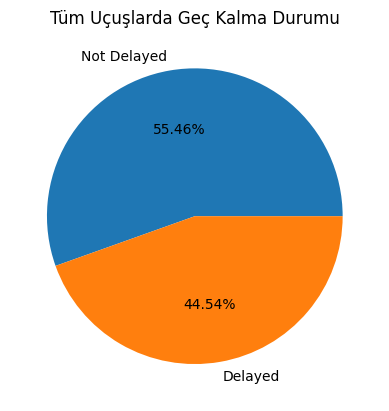

In [17]:
# Uçuşların gecikme durumuna göre grafik gösterimi
delay_fraction=round((data["Delay"]=="Delayed").mean(),3)
print("Overall fraction of delayed flight=",delay_fraction)
total_delay.plot(kind="pie", autopct='%01.02f%%', ylabel="").set_title("Tüm Uçuşlarda Geç Kalma Durumu")

Geç kalan uçuş sayısı toplam uçuşların %44.5 değerini oluşturmaktadır.

In [18]:
# dataframe verisetinde col_name1 ve col_name2 arasında "prob" anlamlılık seviyesinde ilişki olup olmadığını inceleyen fonksiyon
# Ki-karenin yapılabilmesi için; değişkenlerin birbirinden tamamen bağımsız olması, her bir grup için en az 5 adet göslem yapılması gerekmektedir. 
# Ho= The two categorical varibles have no relationship( independent) 
# H1= There is a relationship between two categories (dependent) 
def chi_square(dataframe, col_name1, col_name2, prob):
    contigency=pd.crosstab(dataframe[col_name1],data[col_name2])
    sns.heatmap(contigency, annot=True, cmap="RdYlGn")
    chi_square, p_value, degrees_of_freedom, expected_frequency = stats.chi2_contingency(contigency, correction=True)
    if p_value< (1-prob):
        print("H0 is rejected. There is a relation between ", col_name1, "and",  col_name2)
    else:
        print("H0 is accepted. There is NO a relation between ", col_name1, "and",  col_name2)
    return 

H0 is rejected. There is a relation between  Airline and Delay


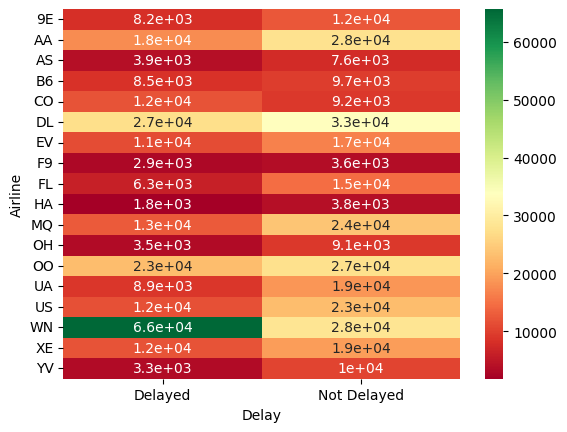

In [19]:
# Uçuş gecikmesi ile havayolu şirketi arasında ilişki var mıdır? 
# "Airlines" ve "Delay" featureları kategorik değişken olduklarından dolayı aralarındaki ilişkinin (significant association) varlığının tespiti için Ki-kare testi yapılacaktır. 
chi_square(data,"Airline", "Delay", prob=0.95)

Havayolu şirketi ile uçuşların geç kalma durumu arasında bir ilişki olduğu tespit edilmiştir. 

In [20]:
# Havayolları şirket bazlı geciken uçuş sayısı kaç adettir? 
# Havayolu şirketlerinin geciken uçuş sayısı, gerçekleştirdiği uçuşların % kaçını oluşturmaktadır? (self_delayed_flight_percentage)    
# Havayolu şirketlerinin geciken uçuş sayısı, tüm geciken uçuşların % kaçını oluşturmaktadır? (total_delayed_flight_percentage)

delay_by_airlines=data.groupby(["Airline","Delay"]).agg(total_number=("Airline","count")).reset_index()
pivot_delay_by_airlines= delay_by_airlines.pivot_table(values="total_number",index="Airline",columns="Delay")
pivot_delay_by_airlines["self_delayed_flight_percentage"]=pivot_delay_by_airlines["Delayed"]/(pivot_delay_by_airlines["Delayed"]+pivot_delay_by_airlines["Not Delayed"])
pivot_delay_by_airlines["total_delayed_flight_percentage"]=pivot_delay_by_airlines["Delayed"]/pivot_delay_by_airlines["Delayed"].sum()
pivot_delay_by_airlines= pivot_delay_by_airlines.sort_values(by="total_delayed_flight_percentage", ascending=False)
pivot_delay_by_airlines.head()

Delay    Delayed  Not Delayed  self_delayed_flight_percentage  \
Airline                                                         
WN         65657        28440                        0.697759   
DL         27452        33488                        0.450476   
OO         22760        27494                        0.452899   
AA         17736        27920                        0.388470   
MQ         12742        23863                        0.348095   

Delay    total_delayed_flight_percentage  
Airline                                   
WN                              0.273270  
DL                              0.114258  
OO                              0.094729  
AA                              0.073819  
MQ                              0.053033

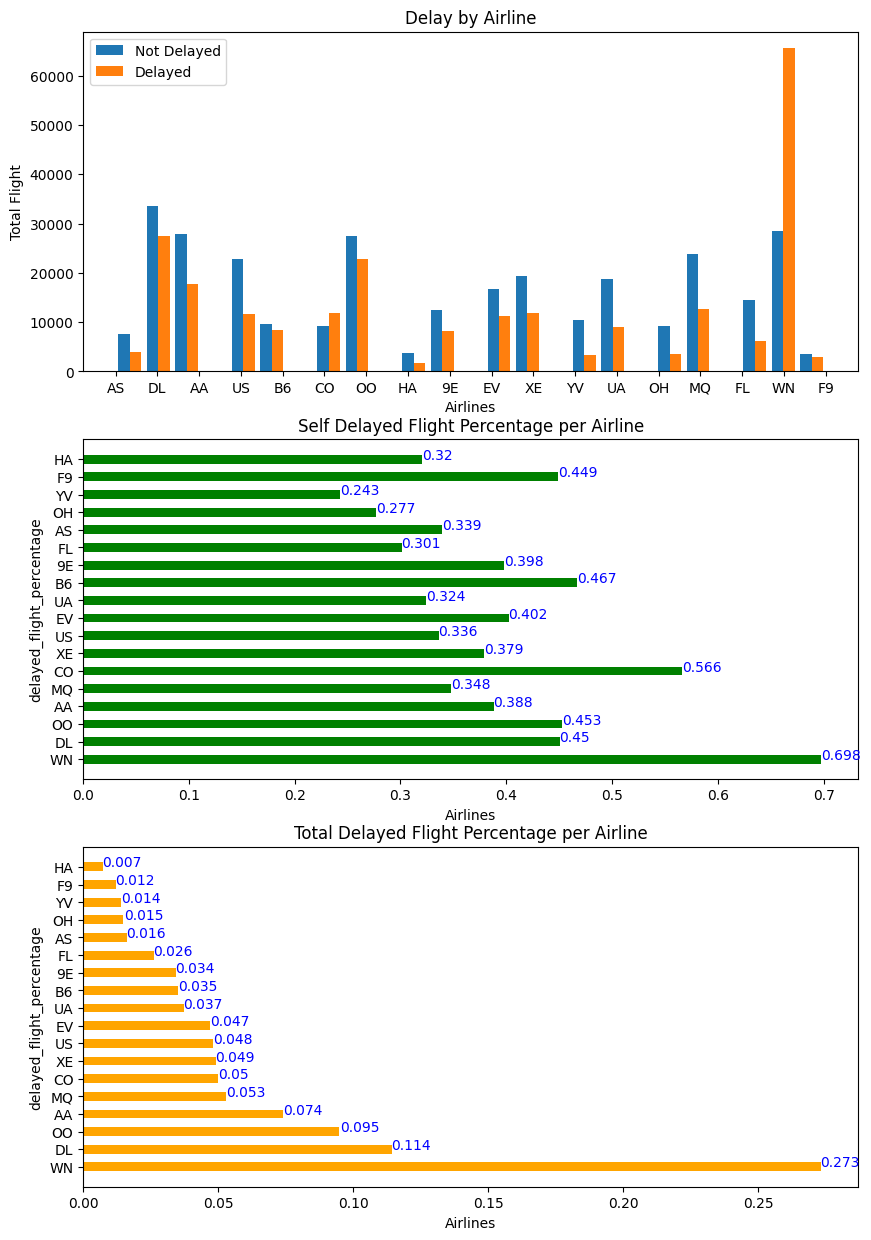

In [21]:
# Havayolu şirketlerinin gerçekleştirdiği uçuşların geç kalma durum analizi için bar chart: 

fig1, (ax1,ax2, ax3) = plt.subplots(3, 1)
# ax1 grafiği, havayolu şirketi bazlı zamanında gerçekleşen ve geciken uçuş sayılarını kıyaslamaktadır. 
# ax2 grafiği, havayolu şirketlerinin geciken uçuş sayısının gerçekleştirdiği uçuşların % kaçını oluşturduğunu göstermektedir. 
# ax3 grafiği, havayolu şirketlerinin geciken uçuş sayısının tüm geciken uçuşların % kaçını oluşturduğunu göstermektedir. 

ax1.hist([data["Airline"][data["Delay"] == "Not Delayed"], data["Airline"][data["Delay"] == "Delayed"]], 25, alpha = 1, histtype='bar', label=["Not Delayed","Delayed"])
ax1.set(xlabel="Airlines", ylabel="Total Flight")
ax1.set_title("Delay by Airline")
ax1.legend()

ax2.barh(pivot_delay_by_airlines.index,pivot_delay_by_airlines["self_delayed_flight_percentage"], width, color = "green")
ax2.set(xlabel="Airlines", ylabel="delayed_flight_percentage")
for i, v in enumerate(pivot_delay_by_airlines["self_delayed_flight_percentage"].round(decimals = 3)):
    ax2.text(v, i , str(v),color = 'blue', ha="left")
ax2.set_title("Self Delayed Flight Percentage per Airline")

ax3.barh(pivot_delay_by_airlines.index,pivot_delay_by_airlines["total_delayed_flight_percentage"], width, color = "orange")
ax3.set(xlabel="Airlines", ylabel="delayed_flight_percentage")
for i, v in enumerate(pivot_delay_by_airlines["total_delayed_flight_percentage"].round(decimals = 3)):
    ax3.text(v, i , str(v),color = 'blue', ha="left")
ax3.set_title("Total Delayed Flight Percentage per Airline")

fig1.set_size_inches(10, 15)
plt.show()

Grafiklerden ve "pivot_delay_by_airlines" isimli pivot tablodan çıkarılan sonuçlar şu şekildedir: 
* WN yani South west havayollarının uçuşlarının % 69.8 i geç kalmaktadır. Bu değer en yüksek değerdir. 
* Uçuşları en fazla oranda geç kalan diğer havayolları ise sırasıyla %56.6 ile CO ve %46.7 ile B6 havayolu firmalarıdır. 
* Uçuşları en az oranda geç kalan havayolu firması % 27.7 ile OH havayollarıdır. 
* Geç kalan uçuşların tamamının %27.3ü WN havayollarına aittir. WN havayollarından sonra en fazla geç kalan uçuşa neden olan firma % 11.4 ile DL havayollarıdır. 
* Tüm geç kalan uçuşların içinde en az paya sahip olan firma %0.7 ile HA havayollarıdır. 

 

In [22]:
# Hangi havayollarının geç kalan uçuş sayısı, zamanında gerçekleştirdiği uçuş sayısından fazladır? 
pivot_delay_by_airlines[pivot_delay_by_airlines["Delayed"]>=pivot_delay_by_airlines["Not Delayed"]]

Delay    Delayed  Not Delayed  self_delayed_flight_percentage  \
Airline                                                         
WN         65657        28440                        0.697759   
CO         11957         9161                        0.566199   

Delay    total_delayed_flight_percentage  
Airline                                   
WN                              0.273270  
CO                              0.049766

Geç kalan uçuş sayısı, zamanında gerçekleşen uçuş sayısından fazla olan hava yolu firmaları WN ve CO havayollarıdır. 
WN hava yollarının uçuşlarının %69u, CO nun ise %56.6 sı geç kalmaktadır. 

In [23]:
# dataframe verisetinde col_name1 sütunu baz alınarak col_name2 sütunu verileri tekrar sayısına göre sıralayan
# ve en fazla tekrarlanan  3 değerleri veren "top" fonksiyonu ve en az tekrarlanan 3 değeri veren "bottom" fonksiyonları tanımlanmıştır. 

def bottom(dataframe, col_name1, col_name2, number ):
    Bottom=dataframe.groupby([col_name1, col_name2]).apply(lambda x: pd.Series({'total_flights': len(x["Airline"])})).reset_index()
    Bottom=Bottom.assign(rank_popular=lambda x:x.groupby([col_name1])['total_flights'].rank(method='first', ascending=True))
    Bottom= Bottom[lambda x: x['rank_popular'] <= number].reset_index(drop=True)
    Bottom[col_name2]=Bottom[col_name2].astype(str)+" / "+Bottom["total_flights"].astype(str)
    Bottom=Bottom.assign(rank_popular=lambda x: 'bottom_' + x['rank_popular'].astype(int).map(str)+"_"+col_name2)
    Bottom=Bottom.pivot_table( columns='rank_popular', values=col_name2, index=col_name1, aggfunc=np.sum).rename_axis(None, axis=1).reset_index()
    Bottom.set_index(col_name1,inplace=True)
    return Bottom

def top(dataframe, col_name1, col_name2, number ):
    Top=dataframe.groupby([col_name1, col_name2]).apply(lambda x: pd.Series({'total_flights': len(x["Airline"])})).reset_index()
    Top=Top.assign(rank_popular=lambda x:x.groupby([col_name1])['total_flights'].rank(method='first', ascending=False))
    Top=Top[lambda x: x['rank_popular'] <= number].reset_index(drop=True)
    Top[col_name2]=Top[col_name2].astype(str)+" / "+Top["total_flights"].astype(str)
    Top=Top.assign(rank_popular=lambda x: 'top_' + x['rank_popular'].astype(int).map(str)+"_"+col_name2)
    Top=Top.pivot_table( columns='rank_popular', values=col_name2, index=col_name1, aggfunc=np.sum).rename_axis(None, axis=1).reset_index()
    Top.set_index(col_name1,inplace=True)
    return Top

In [24]:
# Her bir havayolunun en fazla uçuş gerçekleştirdiği 3 havalimanı hangileridir? 
Top_Airline_AirportTo=top(data, "Airline", "AirportTo", 3 ).copy(deep=True)
Top_Airline_AirportTo.head()

top_1_AirportTo top_2_AirportTo top_3_AirportTo
Airline                                                
9E           DTW / 4245      MEM / 2142      MSP / 1415
AA          DFW / 12920      ORD / 4486      MIA / 3937
AS           SEA / 3561      ANC / 1125       PDX / 848
B6           JFK / 3805      BOS / 2448      MCO / 1425
CO           IAH / 6301      EWR / 3706      CLE / 1026

9E havayolu firmasını incelersek; en fazla uçuşu 4245 uçuşla DTW havalimanına, ikinci sırada 2142 uçuşla MEM havalimanına ve 1415 uçuşla MSP havalimanına gerçekleştirmektedir.  

In [25]:
# Her bir havayolunun en az uçuş gerçekleştirdiği 3 havalimanı hangileridir? 
Bottom_Airline_AirportTo=bottom(data, "Airline", "AirportTo", 3 ).copy(deep=True)
Bottom_Airline_AirportTo.head()

bottom_1_AirportTo bottom_2_AirportTo bottom_3_AirportTo
Airline                                                         
9E                 JAN / 1            ABR / 2            LFT / 2
AA                 MTJ / 4           JAC / 27           KOA / 31
AS                 ADK / 9           BLI / 26           ATL / 31
B6                SJC / 57           HOU / 60           PSE / 62
CO                GUM / 10           JAX / 11           MCI / 14

9E havayolu firmasını incelersek; en az uçuşu 1 uçuşla JAN havalimanına, ikinci sırada 2 uçuşla ABR havalimanına ve 2 uçuşla LFT havalimanına gerçekleştirmektedir. 

In [26]:
# Her bir havayolunun en fazla uçuş gerçekleştirdiği 3 gün hangileridir? 
Top_Airline_DayOfWeek=top(data, "Airline", "DayOfWeek", 3 ).copy(deep=True)
Top_Airline_DayOfWeek.head()

top_1_DayOfWeek   top_2_DayOfWeek   top_3_DayOfWeek
Airline                                                     
9E       Thursday / 3521  Wednesday / 3489     Friday / 3147
AA       Thursday / 7557  Wednesday / 7541     Friday / 7058
AS       Thursday / 1918  Wednesday / 1882     Friday / 1825
B6         Friday / 3018   Thursday / 3011  Wednesday / 2819
CO       Thursday / 3678     Friday / 3431  Wednesday / 3393

9E havayolu firmasını incelersek; en fazla uçuşu 3521 uçuşla perşembe günü, ikinci sırada 3489 uçuşla çarşamba günü ve 3147 uçuşla cuma günü gerçekleştirmektedir.

In [27]:
# Her bir havayolunun en az uçuş gerçekleştirdiği 3 gün hangileridir? 
Bottom_Airline_DayOfWeek=bottom(data, "Airline", "DayOfWeek", 3 ).copy(deep=True)
Bottom_Airline_DayOfWeek.head()

bottom_1_DayOfWeek bottom_2_DayOfWeek bottom_3_DayOfWeek
Airline                                                         
9E         Saturday / 2231      Sunday / 2676     Tuesday / 2808
AA         Saturday / 5438      Sunday / 5969     Tuesday / 6040
AS         Saturday / 1336      Sunday / 1484     Tuesday / 1503
B6         Saturday / 2174     Tuesday / 2279      Monday / 2394
CO         Saturday / 2296      Sunday / 2675     Tuesday / 2751

9E havayolu firmasını incelersek; en az uçuşu 2231 uçuşla cumartesi günü, ikinci sırada 2676 uçuşla pazar günü ve 2808 uçuşla salı günü gerçekleştirmektedir.

In [28]:
# Her bir havayolunun en fazla gecikmiş uçuş gerçekleştirdiği 3 destinasyon havalimanı hangileridir? 
Top_Delayed_Airline_AirportTo=top(data[data["Delay"]=="Delayed"], "Airline", "AirportTo", 3 ).copy(deep=True)
Top_Delayed_Airline_AirportTo.head()

top_1_AirportTo top_2_AirportTo top_3_AirportTo
Airline                                                
9E           DTW / 1682       MEM / 673       MSP / 538
AA           DFW / 3950      MIA / 1745      ORD / 1569
AS           SEA / 1230       ANC / 469       PDX / 254
B6           JFK / 1618      BOS / 1072       FLL / 706
CO           IAH / 3277      EWR / 1955       LAX / 524

9E havayolu firmasını incelersek; uçuşlarının en fazla gecikme gösterdiği destinasyon havalimanları 1681 uçuşla DTW havalimanı, ikinci sırada 673 uçuşla MEM havalimanı ve 538 uçuşla MSP havalimanıdır. 

In [29]:
# Her bir havayolunun en fazla gecikmiş uçuş gerçekleştirdiği 3 kalkış havalimanı hangileridir? 
Top_Delayed_Airline_AirportFrom=top(data[data["Delay"]=="Delayed"], "Airline", "AirportFrom", 3 ).copy(deep=True)
Top_Delayed_Airline_AirportFrom.head()

top_1_AirportFrom top_2_AirportFrom top_3_AirportFrom
Airline                                                      
9E             DTW / 2050         MEM / 670         MSP / 564
AA             DFW / 5590        ORD / 2632        MIA / 1808
AS             SEA / 1182         ANC / 338         PDX / 298
B6             JFK / 1783        BOS / 1237         MCO / 766
CO             IAH / 4134        EWR / 2142         LAX / 575

9E havayolu firmasını incelersek; uçuşlarının en fazla gecikme gösterdiği kalkış havalimanları 2050 uçuşla DTW havalimanı, ikinci sırada 670 uçuşla MEM havalimanı ve 564 uçuşla MSP havalimanıdır.

In [30]:
# Her bir havayolunun en fazla gecikmiş uçuş gerçekleştirdiği 3 gün hangileridir? 
Top_Delayed_Airline_DayOfWeek=top(data[data["Delay"]=="Delayed"], "Airline", "DayOfWeek", 3 ).copy(deep=True)
Top_Delayed_Airline_DayOfWeek.head()

top_1_DayOfWeek   top_2_DayOfWeek top_3_DayOfWeek
Airline                                                    
9E       Wednesday / 1422   Thursday / 1326   Monday / 1287
AA       Wednesday / 3162   Thursday / 2925   Friday / 2584
AS        Wednesday / 644      Friday / 639  Thursday / 634
B6        Thursday / 1694  Wednesday / 1543   Friday / 1311
CO        Thursday / 2215  Wednesday / 2179   Friday / 1812

9E havayolu firmasını incelersek; uçuşlarının en fazla gecikme gösterdiği günler 1422 uçuşla çarşamba, ikinci sırada 1326 uçuşla perşembe ve 1287 uçuşla pazartesi günleridir

In [31]:
# Her bir havayolunun en fazla uçuş gerçekleştirdiği 3 mesafe grubu nedir? 
Top_Airline_Grouped_Length=top(data, "Airline", "Grouped_Length", 3 ).copy(deep=True)
Top_Airline_Grouped_Length.head()

top_1_Grouped_Length     top_2_Grouped_Length  \
Airline                                                     
9E         (75.0, 80.0] / 1286.0    (85.0, 89.0] / 1198.0   
AA       (169.0, 175.0] / 3380.0  (149.0, 155.0] / 2926.0   
AS       (334.0, 655.0] / 1015.0   (218.0, 238.0] / 796.0   
B6       (190.0, 204.0] / 1225.0  (175.0, 182.0] / 1142.0   
CO       (204.0, 218.0] / 1690.0  (218.0, 238.0] / 1683.0   

            top_3_Grouped_Length  
Airline                           
9E       (117.0, 120.0] / 1024.0  
AA       (204.0, 218.0] / 2814.0  
AS        (149.0, 155.0] / 678.0  
B6       (334.0, 655.0] / 1103.0  
CO       (334.0, 655.0] / 1331.0

9E havayolu firmasını incelersek; en fazla uçuş gerçekleştirdiği mesafe ve uçuş sayıları sırasıyla 75-80 mil aralığında 1286 uçuş, 85-89 mil aralığında 1198 uçuş ve 117-120 mil mesafe aralığında 1024 uçuştur. 

In [32]:
# Her bir havayolunun en fazla uçuş gerçekleştirdiği saat dilimi nedir? 
Top_Airline_Time=top(data, "Airline", "Time", 3 ).copy(deep=True)
Top_Airline_Time.head()

top_1_Time       top_2_Time      top_3_Time
Airline                                                   
9E         7-8PM / 1701.0   4-5PM / 1561.0  1-2PM / 1559.0
AA         7-8AM / 3275.0   8-9AM / 3171.0  2-3PM / 3112.0
AS         6-7AM / 1124.0    6-7PM / 889.0   4-6PM / 883.0
B6       11-12AM / 1387.0  9-10AM / 1172.0  7-8PM / 1164.0
CO         2-3PM / 1615.0   8-9AM / 1596.0  4-6PM / 1580.0

9E havayolu firmasını incelersek; en fazla uçuş gerçekleştirdiği saat dilimi ve uçuş sayıları sırasıyla 7-8 PM için 1701 uçuş, 4-5 PM mil için 1561 uçuş ve 1-2 PM için 1559 uçuştur. 

In [33]:
# Her bir havayolunun en az uçuş gerçekleştirdiği 3 mesafe grubu nedir? 
Bottom_Airline_Grouped_Length=bottom(data, "Airline", "Grouped_Length", 3 ).copy(deep=True)
Bottom_Airline_Grouped_Length.head()

bottom_1_Grouped_Length bottom_2_Grouped_Length  \
Airline                                                   
9E        (164.0, 169.0] / 27.0   (182.0, 190.0] / 35.0   
AA        (155.0, 159.0] / 31.0    (84.0, 85.0] / 307.0   
AS           (74.0, 75.0] / 1.0    (97.0, 100.0] / 24.0   
B6           (-0.1, 46.0] / 1.0     (95.0, 97.0] / 31.0   
CO           (-0.1, 46.0] / 6.0   (110.0, 114.0] / 19.0   

        bottom_3_Grouped_Length  
Airline                          
9E        (169.0, 175.0] / 36.0  
AA       (107.0, 110.0] / 508.0  
AS          (69.0, 70.0] / 27.0  
B6        (110.0, 114.0] / 31.0  
CO        (114.0, 117.0] / 24.0

9E havayolu firmasını incelersek; en az uçuş gerçekleştirdiği mesafe ve uçuş sayıları sırasıyla 164-169 mil aralığında 27 uçuş, 182-190 mil aralığında 35 uçuş ve 169-175 mil mesafe aralığında 36 uçuştur.

In [34]:
# Her bir havayolunun en az uçuş gerçekleştirdiği 3 saat dilimi nedir? 
Bottom_Airline_Time=bottom(data, "Airline", "Time", 3 ).copy(deep=True)
Bottom_Airline_Time.head()

bottom_1_Time    bottom_2_Time    bottom_3_Time
Airline                                                 
9E        4-5AM / 15.0   10-11PM / 53.0    8-9PM / 336.0
AA       0-1AM / 150.0  11-12PM / 164.0  10-11PM / 699.0
AS        2-3AM / 31.0     1-2AM / 62.0     0-1AM / 64.0
B6        1-2AM / 15.0     2-3AM / 15.0     0-1AM / 29.0
CO        2-3AM / 28.0     1-2AM / 74.0  10-11PM / 139.0

9E havayolu firmasını incelersek; en az uçuş gerçekleştirdiği saat dilimi ve uçuş sayıları sırasıyla 4-5 AM için 15 uçuş, 10-11PM için 53 uçuş ve 8-9 PM için 336 uçuştur.

In [35]:
# Her bir havayolunun en az geciken uçuş gerçekleştirdiği 3 mesafe grubu nedir? 
Top_Delayed_Airline_Grouped_Length=top(data[data["Delay"]=="Delayed"], "Airline", "Grouped_Length", 3 ).copy(deep=True)
Top_Delayed_Airline_Grouped_Length.head()

top_1_Grouped_Length     top_2_Grouped_Length  \
Airline                                                     
9E          (75.0, 80.0] / 527.0     (85.0, 89.0] / 442.0   
AA       (149.0, 155.0] / 1343.0  (169.0, 175.0] / 1316.0   
AS        (334.0, 655.0] / 365.0   (218.0, 238.0] / 306.0   
B6        (190.0, 204.0] / 611.0   (334.0, 655.0] / 578.0   
CO       (218.0, 238.0] / 1122.0  (204.0, 218.0] / 1061.0   

            top_3_Grouped_Length  
Airline                           
9E          (80.0, 84.0] / 394.0  
AA       (204.0, 218.0] / 1185.0  
AS        (149.0, 155.0] / 235.0  
B6        (164.0, 169.0] / 564.0  
CO        (334.0, 655.0] / 871.0

9E havayolu firmasını incelersek; en fazla geciken uçuş gerçekleştirdiği mesafe ve uçuş sayıları sırasıyla 75-80 mil aralığında 527 uçuş, 85-89 mil aralığında 422 uçuş ve 80-84 mil mesafe aralığında 394 uçuştur.

In [36]:
# Her bir havayolunun en az geciken uçuş gerçekleştirdiği 3 saat dilimi nedir? 
Top_Delayed_Airline_Time=top(data[data["Delay"]=="Delayed"], "Airline", "Time", 3 ).copy(deep=True)
Top_Delayed_Airline_Time.head()

top_1_Time      top_2_Time      top_3_Time
Airline                                                 
9E         3-4PM / 732.0   0-1PM / 703.0   1-2PM / 703.0
AA        4-5PM / 1401.0  2-3PM / 1390.0  6-7PM / 1359.0
AS         6-7PM / 333.0   0-1PM / 298.0   3-4PM / 294.0
B6       11-12AM / 687.0   7-8PM / 610.0   2-3PM / 577.0
CO        4-6PM / 1037.0  2-3PM / 1024.0   0-1PM / 845.0

9E havayolu firmasını incelersek; en az geciken uçuş gerçekleştirdiği saat dilimi ve uçuş sayıları sırasıyla 3-4 PM için 732 uçuş, 0-1PM için 703 uçuş ve 1-2PM için 703 uçuştur.

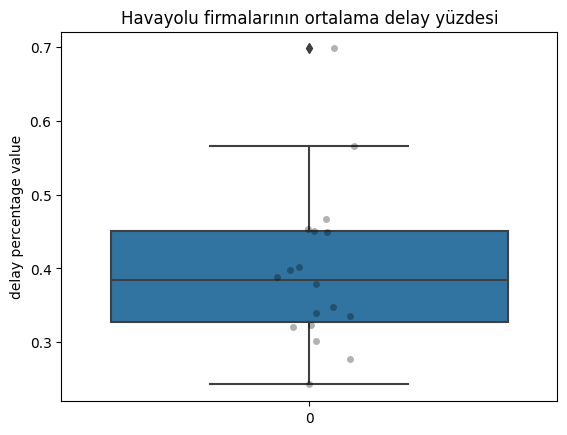

old shape (18, 4)
old mean: 0.3966458996532298
fence_low: 0.14213312966680675
fence_high: 0.6349070369095313
indexes removed because of low outliers: Series([], Name: self_delayed_flight_percentage, dtype: float64)
indexes removed because of high outliers: Airline
WN    0.697759
Name: self_delayed_flight_percentage, dtype: float64
new shape (17, 4)
new mean: 0.37893338223201434


In [37]:
# Havayolu şirketleri ortalama uçuşlarının % kaçı geç kalmaktadır? 
box_plot1= sns.boxplot(pivot_delay_by_airlines["self_delayed_flight_percentage"])
box_plot1= sns.stripplot(pivot_delay_by_airlines["self_delayed_flight_percentage"], marker="o", alpha=0.3, color="black")
box_plot1.axes.set_title("Havayolu firmalarının ortalama delay yüzdesi", fontsize=12)
box_plot1.set_xlabel("")
box_plot1.set_ylabel("delay percentage value")
plt.show()
remove_outlier(pivot_delay_by_airlines, "self_delayed_flight_percentage")

Ortalama olarak havayollarının uçuşlarının % 39.66sı geç kalmaktadır. 
Ortalama değerini anlamsızlaştıran yani outlier konumunda olan tek bir hava yolu firması vardır: WN
Bu firmaya ait veriler çıkarıldığında;  havayollarının uçuşlarının geç kalma yüzdesi ortalaması yeni değeri % 37.89 olmaktadır.

In [38]:
# "X" havayolu hakkında özet bilgi veren bir fonksiyondur. 
def get_AirlineInfo(x): 
    print(x, "HAVAYOLLARI;")
    print("")
    print("Veri setindeki tüm uçuşların %", round(total_flights_by_airlines.loc[x]["Flight_percentage"]*100,3), "kısmı olan ",total_flights_by_airlines.loc[x]["Total_flight"], "uçuş gerçekleştirmiştir.")
    print("")
    print("Gerçekleştirdiği uçuşların", pivot_delay_by_airlines.loc[x]["Delayed"]," adedi geç kalmıştır. Bu rakam havayolu firmasının tüm uçuşlarının %", round(pivot_delay_by_airlines.loc[x]["self_delayed_flight_percentage"]*100,3), " kısmına tekabül ederken; veri setindeki tüm geç kalan uçuşların %", round(pivot_delay_by_airlines.loc[x]["total_delayed_flight_percentage"]*100,3), " kısmını oluşturmaktadır.")
    print("")
    if pivot_delay_by_airlines.loc[x]["Delayed"]>=pivot_delay_by_airlines.loc[x]["Not Delayed"]:
        print("Bu hava yolunun geciken uçuş sayısı, zamanında gerçekleşen uçuş sayısından fazladır.")
        print("")
    print("En fazla uçuş gerçekleştirdiği 3 havalimanı ve uçuş sayıları sırasıyla ", Top_Airline_AirportTo.loc[x]["top_1_AirportTo"], ", ",Top_Airline_AirportTo.loc[x]["top_2_AirportTo"], " ve", Top_Airline_AirportTo.loc[x]["top_3_AirportTo"],"havalimanlarıdır.")
    print("")
    print("En az uçuş gerçekleştirdiği 3 havalimanı ve uçuş sayıları sırasıyla ", Bottom_Airline_AirportTo.loc[x]["bottom_1_AirportTo"], ", ",Bottom_Airline_AirportTo.loc[x]["bottom_2_AirportTo"], " ve", Bottom_Airline_AirportTo.loc[x]["bottom_3_AirportTo"],"havalimanlarıdır.")
    print("")
    print("En fazla uçuş gerçekleştirdiği 3 gün ve o günlerdeki uçuş sayıları sırasıyla",Top_Airline_DayOfWeek.loc[x]["top_1_DayOfWeek"], ", ",Top_Airline_DayOfWeek.loc[x]["top_2_DayOfWeek"], " ve", Top_Airline_DayOfWeek.loc[x]["top_3_DayOfWeek"],"günleridir." )
    print("")
    print("En az uçuş gerçekleştirdiği 3 gün ve o günlerdeki uçuş sayıları sırasıyla",Bottom_Airline_DayOfWeek.loc[x]["bottom_1_DayOfWeek"], ", ",Bottom_Airline_DayOfWeek.loc[x]["bottom_2_DayOfWeek"], " ve", Bottom_Airline_DayOfWeek.loc[x]["bottom_3_DayOfWeek"],"günleridir." )
    print("")
    print("En fazla gecikmiş uçuş gerçekleştirdiği 3 destinasyon havalimanı ve uçuş sayıları sırasıyla", Top_Delayed_Airline_AirportTo.loc[x]["top_1_AirportTo"], ", ",Top_Delayed_Airline_AirportTo.loc[x]["top_2_AirportTo"], " ve", Top_Delayed_Airline_AirportTo.loc[x]["top_3_AirportTo"],"havalimanlarıdır.")
    print("")
    print("En fazla gecikmiş uçuş gerçekleştirdiği 3 kalkış havalimanı ve uçuş sayıları sırasıyla", Top_Delayed_Airline_AirportFrom.loc[x]["top_1_AirportFrom"], ", ",Top_Delayed_Airline_AirportFrom.loc[x]["top_2_AirportFrom"], " ve", Top_Delayed_Airline_AirportFrom.loc[x]["top_3_AirportFrom"],"havalimanlarıdır.")
    print("")
    print("En fazla gecikmiş uçuş gerçekleştirdiği 3 gün ve o günlerdeki uçuş sayıları sırasıyla",Top_Delayed_Airline_DayOfWeek.loc[x]["top_1_DayOfWeek"], ", ",Top_Delayed_Airline_DayOfWeek.loc[x]["top_2_DayOfWeek"], " ve", Top_Delayed_Airline_DayOfWeek.loc[x]["top_3_DayOfWeek"],"günleridir." )    
    print("")
    print("En fazla uçuş gerçekleştirdiği 3 mesafe grubu ve uçuş sayıları sırasıyla ", Top_Airline_Grouped_Length.loc[x]["top_1_Grouped_Length"], ", ",Top_Airline_Grouped_Length.loc[x]["top_2_Grouped_Length"], " ve", Top_Airline_Grouped_Length.loc[x]["top_3_Grouped_Length"]," mesafe gruplarıdır.")
    print("")
    print("En fazla gecikmiş uçuş gerçekleştirdiği 3 mesafe grubu ve uçuş sayıları sırasıyla", Top_Delayed_Airline_Grouped_Length.loc[x]["top_1_Grouped_Length"], ", ",Top_Delayed_Airline_Grouped_Length.loc[x]["top_2_Grouped_Length"], " ve", Top_Delayed_Airline_Grouped_Length.loc[x]["top_3_Grouped_Length"],"mesafe gruplarıdır.")
    print("")
    print("En az uçuş gerçekleştirdiği 3 mesafe grubu ve uçuş sayıları sırasıyla ", Bottom_Airline_Grouped_Length.loc[x]["bottom_1_Grouped_Length"], ", ",Bottom_Airline_Grouped_Length.loc[x]["bottom_2_Grouped_Length"], " ve", Bottom_Airline_Grouped_Length.loc[x]["bottom_3_Grouped_Length"]," mesafe gruplarıdır.")    
    print("")
    print("En fazla uçuş gerçekleştirdiği 3 saat dilimi ve uçuş sayıları sırasıyla ", Top_Airline_Time.loc[x]["top_1_Time"], ", ",Top_Airline_Time.loc[x]["top_2_Time"], " ve", Top_Airline_Time.loc[x]["top_3_Time"]," zaman dilimleridir.")
    print("")
    print("En fazla gecikmiş uçuş gerçekleştirdiği 3 saat dilimi ve uçuş sayıları sırasıyla", Top_Delayed_Airline_Time.loc[x]["top_1_Time"], ", ",Top_Delayed_Airline_Time.loc[x]["top_2_Time"], " ve", Top_Delayed_Airline_Time.loc[x]["top_3_Time"],"zaman dilimleridir.")
    print("")
    print("En az uçuş gerçekleştirdiği 3 saat dilimi ve uçuş sayıları sırasıyla ", Bottom_Airline_Time.loc[x]["bottom_1_Time"], ", ",Bottom_Airline_Time.loc[x]["bottom_2_Time"], " ve", Bottom_Airline_Time.loc[x]["bottom_3_Time"]," zaman dilimleridir.")    
    
    return

In [39]:
get_AirlineInfo("WN")

WN HAVAYOLLARI;

Veri setindeki tüm uçuşların % 17.445 kısmı olan  94097.0 uçuş gerçekleştirmiştir.

Gerçekleştirdiği uçuşların 65657.0  adedi geç kalmıştır. Bu rakam havayolu firmasının tüm uçuşlarının % 69.776  kısmına tekabül ederken; veri setindeki tüm geç kalan uçuşların % 27.327  kısmını oluşturmaktadır.

Bu hava yolunun geciken uçuş sayısı, zamanında gerçekleşen uçuş sayısından fazladır.

En fazla uçuş gerçekleştirdiği 3 havalimanı ve uçuş sayıları sırasıyla  LAS / 6362 ,  MDW / 6214  ve PHX / 5100 havalimanlarıdır.

En az uçuş gerçekleştirdiği 3 havalimanı ve uçuş sayıları sırasıyla  CRP / 138 ,  JAN / 219  ve IAD / 239 havalimanlarıdır.

En fazla uçuş gerçekleştirdiği 3 gün ve o günlerdeki uçuş sayıları sırasıyla Thursday / 16118 ,  Wednesday / 16118  ve Friday / 14393 günleridir.

En az uçuş gerçekleştirdiği 3 gün ve o günlerdeki uçuş sayıları sırasıyla Saturday / 9791 ,  Sunday / 12061  ve Monday / 12808 günleridir.

En fazla gecikmiş uçuş gerçekleştirdiği 3 destinasyon hava

In [40]:
## FLIGHT FEATURE

In [41]:
#  Verisetindeki uçuşlar kaç değişik uçak ile gerçekleştirilmiştir? 
unique_aircraft=data["Flight"].unique()
data["Flight"].nunique()

6585

Toplam 6585 adet değişik uçak kullanılmıştır. 

In [42]:
# Her bir uçak ile kaç uçuş gerçekleştirilmiştir? 
total_flight_by_aircraft=pd.DataFrame(data["Flight"].value_counts()).reset_index().rename(columns={"index":"Flight","Flight":"Total_flight"}).sort_values(by="Total_flight", ascending=False)
total_flight_by_aircraft["cum_percentage"]=total_flight_by_aircraft["Total_flight"].cumsum()/total_flight_by_aircraft["Total_flight"].sum()
total_flight_by_aircraft.head()

Flight  Total_flight  cum_percentage
0     16           420        0.000779
1      5           407        0.001533
2      9           401        0.002277
3      8           396        0.003011
4     62           364        0.003686

En fazla uçuş, 420 adet uçuşla 16 numaralı uçak ile gerçekleştirilmiştir. 

In [43]:
# Tüm uçuşların %90ınıda kullanılan uçak sayısı kaçtır?
active_flights=total_flight_by_aircraft.loc[total_flight_by_aircraft["cum_percentage"]<=0.90]
print("Tüm uçuşların %90ınıda kullanılan uçak sayısı: ", len(active_flights))

Tüm uçuşların %90ınıda kullanılan uçak sayısı:  4621


H0 is rejected. There is a relation between  Flight and Delay


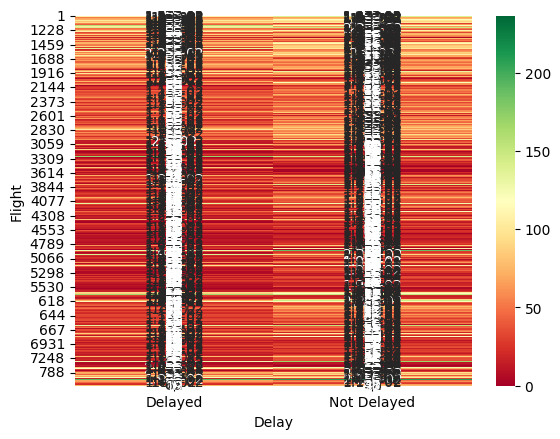

In [44]:
# Uçak ile delay arasında bir ilişki var mıdır? 
chi_square(data, "Flight", "Delay", prob=0.95)

Kullanılan uçak ile uçuşun geç kalması arasında ilişki olduğu tespit edilmiştir. 

In [45]:
# En çok kullanılan ilk 100 uçak için geciken uçuş sayısı değerleri nedir?
active_models= total_flight_by_aircraft[:100]
active_models=active_models.set_index("Flight")
delay_by_Flight=data.groupby(["Flight","Delay"]).agg(total_number=("Flight","count")).reset_index()
pivot_delay_by_Flight= delay_by_Flight.pivot_table(values="total_number",index="Flight",columns="Delay").replace(np.nan,0)
pivot_delay_by_Flight.loc[active_models.index].head()

Delay   Delayed  Not Delayed
Flight                      
16        216.0        204.0
5         190.0        217.0
9         192.0        209.0
8         160.0        236.0
62        139.0        225.0

16 nolu uçağın gerçekleştirmiş olduğu uçuşların 216 sı geç kalmıştır.  

In [46]:
# Uçak  bazlı geciken uçuş sayısı kaç adettir? 
# Uçak bazlı geciken uçuş sayısı, o uçakla gerçekleştirilen uçuşların % kaçını oluşturmaktadır? (self_delayed_flight_percentage)    
# Uçak bazlı geciken uçuş sayıs, tüm geciken uçuşların % kaçını oluşturmaktadır? (total_delayed_flight_percentage)

pivot_delay_by_Flight["self_delayed_flight_percentage"]=pivot_delay_by_Flight["Delayed"]/(pivot_delay_by_Flight["Delayed"]+pivot_delay_by_Flight["Not Delayed"])
pivot_delay_by_Flight["total_delayed_flight_percentage"]=pivot_delay_by_Flight["Delayed"]/pivot_delay_by_Flight["Delayed"].sum()
pivot_delay_by_Flight= pivot_delay_by_Flight.sort_values(by="self_delayed_flight_percentage", ascending=False)
pivot_delay_by_Flight.head()

Delay   Delayed  Not Delayed  self_delayed_flight_percentage  \
Flight                                                         
3349        1.0          0.0                             1.0   
4544        1.0          0.0                             1.0   
3590       28.0          0.0                             1.0   
3318        7.0          0.0                             1.0   
3437        2.0          0.0                             1.0   

Delay   total_delayed_flight_percentage  
Flight                                   
3349                           0.000004  
4544                           0.000004  
3590                           0.000117  
3318                           0.000029  
3437                           0.000008

In [47]:
# Hangi uçağın kullanıldığı geç kalan uçuş sayısı, zamanında gerçekleşen uçuş sayısından fazladır? 
all_delayed_flight= pivot_delay_by_Flight[pivot_delay_by_Flight["self_delayed_flight_percentage"]==1]
print("Tüm uçuşlarında geç kalan uçak sayısı:",len(all_delayed_flight))
print("Tüm uçuşlarında geç kalan uçak sayısı, tüm uçak sayısının %", len(all_delayed_flight)*100/data["Flight"].nunique(),"dir")
all_delayed_flight.head()

Tüm uçuşlarında geç kalan uçak sayısı: 33
Tüm uçuşlarında geç kalan uçak sayısı, tüm uçak sayısının % 0.5011389521640092 dir


Delay   Delayed  Not Delayed  self_delayed_flight_percentage  \
Flight                                                         
3349        1.0          0.0                             1.0   
4544        1.0          0.0                             1.0   
3590       28.0          0.0                             1.0   
3318        7.0          0.0                             1.0   
3437        2.0          0.0                             1.0   

Delay   total_delayed_flight_percentage  
Flight                                   
3349                           0.000004  
4544                           0.000004  
3590                           0.000117  
3318                           0.000029  
3437                           0.000008

Tüm uçuşlarında geç kalan uçak sayısı 33 olup, hangi uçakların olduğu bilgisi "all_delayed_flight" tablosunda verilmiştir. 
Tüm uçuşlarında geç kalan uçak sayısı, tüm uçak sayısının % 0.5dir.

In [48]:
# Tüm uçuşlarında geç kalan bu uçaklar kaç adet uçuşta kullanılmıştır? 
print("Tüm uçuşlarında geç kalan",len(all_delayed_flight), "adet uçak", len(data.set_index("Flight").loc[all_delayed_flight.index]),"adet uçuşta kullanılmıştır")

Tüm uçuşlarında geç kalan 33 adet uçak 121 adet uçuşta kullanılmıştır


In [49]:
# Tüm uçuşlarında geç kalan uçaklar hangi havayolları tarafından kaç adet uçuşta kullanılmıştır? 
data.set_index("Flight").loc[all_delayed_flight.index].groupby("Airline").agg(total_number=("Airline","count"))

total_number
Airline              
9E                  2
EV                  4
OO                 13
WN                102

Görüldüğü üzere tüm uçuşlarında geç kalan 33 modelin kullanıldığı bu uçuşlar 4 havayoluna aittir. 102 uçuş WN, 13 uçuş OO hava yollarına aittir

In [50]:
# Tüm uçuşlarında geç kalan uçaklar hangi rotalarda kaç adet uçuşta kullanılmıştır? 
a= data.set_index("Flight").loc[all_delayed_flight.index].reset_index()
pd.crosstab(a['AirportFrom'], a['AirportTo'], margins=True).head()

AirportTo    ABQ  ALB  AUS  BNA  CMH  CVG  DAL  DEN  DTW  ELP  ...  SAN  SAT  \
AirportFrom                                                    ...             
ABQ            0    0    0    0    0    0    0    0    0    0  ...    0    0   
ATL            0    0    0    0    0    0    0    0    0    0  ...    0    0   
AUS            0    0    0    0    0    0    0    0    0    0  ...    1    0   
BDL            0    0    0    0    0    0    0    0    0    0  ...    0    0   
BOI            0    0    0    0    0    0    0    0    0    0  ...    0    0   

AirportTo    SEA  SLC  SMF  SNA  STL  TPA  TWF  All  
AirportFrom                                          
ABQ            0    0    0    0    0    0    0    1  
ATL            0    0    0    0    0    0    0    1  
AUS            0    0    0    0    0    0    0    2  
BDL            0    0    0    0    0    0    0    5  
BOI            0    0    0    0    0    0    0   11  

[5 rows x 40 columns]

 Tüm uçuşları geç kalan 33 uçağın kullanıldığı 121 uçuşun 15i BOI havalimanından kalkmıştır. 13 ü ise LAX havalimanına uçmuştur. 

In [51]:
# Kullanıldığı uçuşların yarısından fazlasında geç kalan uçaklar nelerdir? 
# Bu şekilde olan kaç uçak vardır? 
half_delayed_flight= pivot_delay_by_Flight[pivot_delay_by_Flight["self_delayed_flight_percentage"]>=0.5]
print("Kullanıldığı uçuşların yarısından fazlasında geç kalan uçak sayısı:",len(half_delayed_flight))
print("Kullanıldığı uçuşların yarısından fazlasında geç kalan uçak sayısı, tüm uçak syısının %", round(len(half_delayed_flight)*100/data["Flight"].nunique(),3),"dir")
half_delayed_flight.head()

Kullanıldığı uçuşların yarısından fazlasında geç kalan uçak sayısı: 2056
Kullanıldığı uçuşların yarısından fazlasında geç kalan uçak sayısı, tüm uçak syısının % 31.222 dir


Delay   Delayed  Not Delayed  self_delayed_flight_percentage  \
Flight                                                         
3349        1.0          0.0                             1.0   
4544        1.0          0.0                             1.0   
3590       28.0          0.0                             1.0   
3318        7.0          0.0                             1.0   
3437        2.0          0.0                             1.0   

Delay   total_delayed_flight_percentage  
Flight                                   
3349                           0.000004  
4544                           0.000004  
3590                           0.000117  
3318                           0.000029  
3437                           0.000008

In [52]:
# Kullanıldığı uçuşların yarısından fazlasında geç kalan uçaklar hangi rotalarda kaç adet uçuşta kullanılmıştır? 
a= data.set_index("Flight").loc[half_delayed_flight.index].reset_index()
pd.crosstab(a['AirportFrom'], a['AirportTo'], margins=True).head()

AirportTo    ABE  ABI  ABQ  ACV  ACY  ADQ  AEX  AGS  ALB  AMA  ...  TUL  TUS  \
AirportFrom                                                    ...             
ABE            0    0    0    0    0    0    0    0    0    0  ...    0    0   
ABQ            0    0    0    0    0    0    0    0    0    0  ...    0   30   
ABR            0    0    0    0    0    0    0    0    0    0  ...    0    0   
ACV            0    0    0    0    0    0    0    0    0    0  ...    0    0   
ADQ            0    0    0    0    0    0    0    0    0    0  ...    0    0   

AirportTo    TVC  TWF  TXK  TYS  VPS  XNA  YUM   All  
AirportFrom                                           
ABE            0    0    0    0    0    0    0    80  
ABQ            0    0    0    0    0    0    0  1027  
ABR            0    0    0    0    0    0    0     2  
ACV            0    0    0    0    0    0    0   107  
ADQ            0    0    0    0    0    0    0    30  

[5 rows x 248 columns]

Gerçekleştirdiği uçuşların yarısından fazlasında geç kalan 2056 uçak, toplam 168518 uçuşta kullanılmıştır. 

In [53]:
# Kullanıldığı uçuşların yarısından fazlasında geç kalan uçaklar hangi havayolları tarafından kaç adet uçuşta kullanılmıştır? 
a= data.set_index("Flight").loc[half_delayed_flight.index].groupby("Airline").agg(total_number=("Airline","count")).sort_values(by="total_number",ascending=False)
a["cum_percentage"]=a["total_number"].cumsum()/a["total_number"].sum()
a.head()

total_number  cum_percentage
Airline                              
WN              47111        0.279561
DL              21562        0.407511
AA              14389        0.492897
OO              13220        0.571345
US               9379        0.627001

Gerçekleştirdiği uçuşların yarısından fazlasında geç kalan 2056 uçağın kullanıldığı 168518 uçuştan 47111 adeti WN havayollarına aittir. 

In [54]:
print("Bu uçak modellerinin kullanıldığı uçuşların %", round(a.loc[a["cum_percentage"]<=0.5].tail(1).iat[0,1]*100,3), "18 havayolu şirketinden",len(a.loc[a["cum_percentage"]<=0.5]) ,"adet havayoluna aittir:" ,list(a.loc[a["cum_percentage"]<=0.5].index)) 

Bu uçak modellerinin kullanıldığı uçuşların % 49.29 18 havayolu şirketinden 3 adet havayoluna aittir: ['WN', 'DL', 'AA']


## "AIRPORTTO" & "AIRPORTFROM" FEATURES

In [55]:
#  Verisetindeki uçuşlar kaç değişik havalimanına gerçekleştirilmiştir? 
unique_airportTo=data["AirportTo"].unique()
print("Verisetinde yer alan destinasyon havalimanı sayısı:",data["AirportTo"].nunique())
unique_airportTo

Verisetinde yer alan destinasyon havalimanı sayısı: 293


array(['IAH', 'CLT', 'DFW', 'SEA', 'MSP', 'DTW', 'ORD', 'ATL', 'PDX',
       'JFK', 'SLC', 'HNL', 'PHX', 'MCO', 'OGG', 'LAX', 'KOA', 'ITO',
       'SFO', 'MIA', 'IAD', 'SMF', 'PHL', 'LIH', 'DEN', 'LGA', 'MEM',
       'CVG', 'YUM', 'CWA', 'MKE', 'BQN', 'FAI', 'LAS', 'ANC', 'BOS',
       'LGB', 'FLL', 'SJU', 'EWR', 'DCA', 'BWI', 'RDU', 'MCI', 'TYS',
       'SAN', 'ONT', 'OAK', 'MDW', 'BNA', 'DAL', 'CLE', 'JAX', 'JNU',
       'RNO', 'ELP', 'SAT', 'OTZ', 'MBS', 'BDL', 'STL', 'HOU', 'AUS',
       'SNA', 'SJC', 'LIT', 'TUS', 'TUL', 'CMH', 'LAN', 'IND', 'AMA',
       'CRP', 'PIT', 'RKS', 'FWA', 'TPA', 'PBI', 'JAN', 'DSM', 'ADQ',
       'GRB', 'PVD', 'ABQ', 'SDF', 'RSW', 'MSY', 'BUR', 'BOI', 'TLH',
       'BHM', 'ACV', 'ORF', 'BET', 'KTN', 'RIC', 'SRQ', 'BTR', 'XNA',
       'MHT', 'GRR', 'SBN', 'SBA', 'ROA', 'CID', 'GPT', 'MFR', 'SGU',
       'HPN', 'OMA', 'OTH', 'GSP', 'LMT', 'BUF', 'MSN', 'BFL', 'CAE',
       'HRL', 'OKC', 'SYR', 'COS', 'BTV', 'CDC', 'SCC', 'DAY', 'SJT',
       'TVC', 'ROC',

293 farklı havalimanına uçuş gerçekleştirilmiştir. 

In [56]:
#Her bir havalimanına gerçekleştirilen uçuş sayısı nedir ve toplam uçuşların % kaçını oluşturmaktadır? 
total_flights_by_airportTo=data["AirportTo"].value_counts().reset_index().rename(columns={"index":"AirportTo","AirportTo":"Total_flight"}).sort_values(by="Total_flight", ascending=False)
total_flights_by_airportTo["cum_percentage"]=total_flights_by_airportTo["Total_flight"].cumsum()/total_flights_by_airportTo["Total_flight"].sum()
total_flights_by_airportTo.head()

AirportTo  Total_flight  cum_percentage
0       ATL         34440        0.063851
1       ORD         24871        0.109961
2       DFW         22153        0.151032
3       DEN         19848        0.187829
4       LAX         16656        0.218709

En fazla uçuş 34.440 ile ATL havalimanına gerçekleştirilmiştir. Diğer bir ifadeyle tüm uçuşların %6.38i bu havalimanına gerçekleştirilmiştir. 

In [57]:
total_flights_by_airportTo.loc[total_flights_by_airportTo["cum_percentage"]<=0.51].head()
print("Tüm uçuşların %", round(total_flights_by_airportTo.loc[total_flights_by_airportTo["cum_percentage"]<=0.51].tail(1).iat[0,2]*100,3), "293 havalimanından ",len(total_flights_by_airportTo.loc[total_flights_by_airportTo["cum_percentage"]<=0.51]) ,"adet havalimanına uçmuştur.")
print("Bu destinasyon havalimaları: ",list(total_flights_by_airportTo.loc[total_flights_by_airportTo["cum_percentage"]<=0.51]["AirportTo"]))

Tüm uçuşların % 50.854 293 havalimanından  19 adet havalimanına uçmuştur.
Bu destinasyon havalimaları:  ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'DTW', 'LAS', 'SFO', 'CLT', 'MCO', 'SLC', 'MSP', 'EWR', 'JFK', 'BOS', 'BWI', 'LGA']


H0 is rejected. There is a relation between  AirportTo and Delay


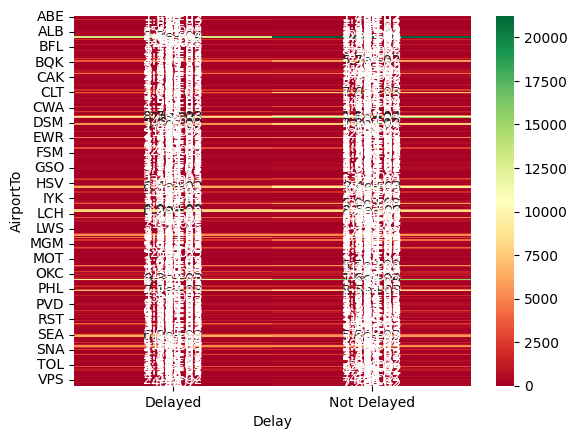

In [58]:
# Destinasyon havalimanı ile uçuşların geç kalması arasında ilişki var mı?
chi_square(data, "AirportTo", "Delay", prob=0.95)

Kalkış havalimanı ile uçuşların geç kalması arasında anlamlı ilişki mevcuttur.    

In [59]:
# Destinasyon havalanın bazlı uçuş geç kalış oranları nedir? 
delay_by_airportTo=data.groupby(["AirportTo","Delay"]).agg(total_number=("AirportTo","count")).reset_index()
pivot_delay_by_airportTo= delay_by_airportTo.pivot_table(values="total_number",index="AirportTo",columns="Delay").replace(np.nan,0)
pivot_delay_by_airportTo["delay_fraction"]=pivot_delay_by_airportTo["Delayed"]/(pivot_delay_by_airportTo["Delayed"]+ pivot_delay_by_airportTo["Not Delayed"])
pivot_delay_by_airportTo=pivot_delay_by_airportTo.sort_values(by="delay_fraction", ascending= False)
pivot_delay_by_airportTo["total_delay_percentage"]=pivot_delay_by_airportTo["Delayed"]/(data["Delay"]=="Delayed").sum() # gecikmiş tüm uçuşlardaki oran
pivot_delay_by_airportTo

Delay      Delayed  Not Delayed  delay_fraction  total_delay_percentage
AirportTo                                                              
OAK         2409.0       1372.0        0.637133                0.010026
RDD           76.0         44.0        0.633333                0.000316
ONT         1226.0        717.0        0.630983                0.005103
MDW         4446.0       2656.0        0.626021                0.018505
ISP          395.0        236.0        0.625990                0.001644
...            ...          ...             ...                     ...
FLG           41.0        178.0        0.187215                0.000171
TEX            5.0         22.0        0.185185                0.000021
SCC           10.0         46.0        0.178571                0.000042
GGG            5.0         26.0        0.161290                0.000021
ADK            0.0          9.0        0.000000                0.000000

[293 rows x 4 columns]

pivot_delay_by_airportTo tablosundan görüldüğü üzere ADK havalimanına giden uçuşlardan hiçbiri geç kalmazken; GGG havalimanına giden uçuşların %16sı geç kalmıştır. En fazla geç kalan uçuş oranına sahip destinasyon havalimanı ise  OAK havalimanıdır.  OAK havalimanına kalkan uçuşların %63.7si geç kalmaktadır. OAK havalimanına giden ve geç kalan uçuşlar, tüm geç kalan uçuşların %1 lik kısmını oluşturmaktadır

In [60]:
active=total_flights_by_airportTo.loc[total_flights_by_airportTo["cum_percentage"]<=0.51].set_index("AirportTo")
active

Total_flight  cum_percentage
AirportTo                              
ATL               34440        0.063851
ORD               24871        0.109961
DFW               22153        0.151032
DEN               19848        0.187829
LAX               16656        0.218709
IAH               15819        0.248037
PHX               15558        0.276881
DTW               13146        0.301253
LAS               11918        0.323349
SFO               11792        0.345211
CLT               11132        0.365849
MCO               10605        0.385511
SLC               10486        0.404952
MSP               10181        0.423827
EWR                9670        0.441755
JFK                9490        0.459349
BOS                9429        0.476830
BWI                8557        0.492694
LGA                8549        0.508544

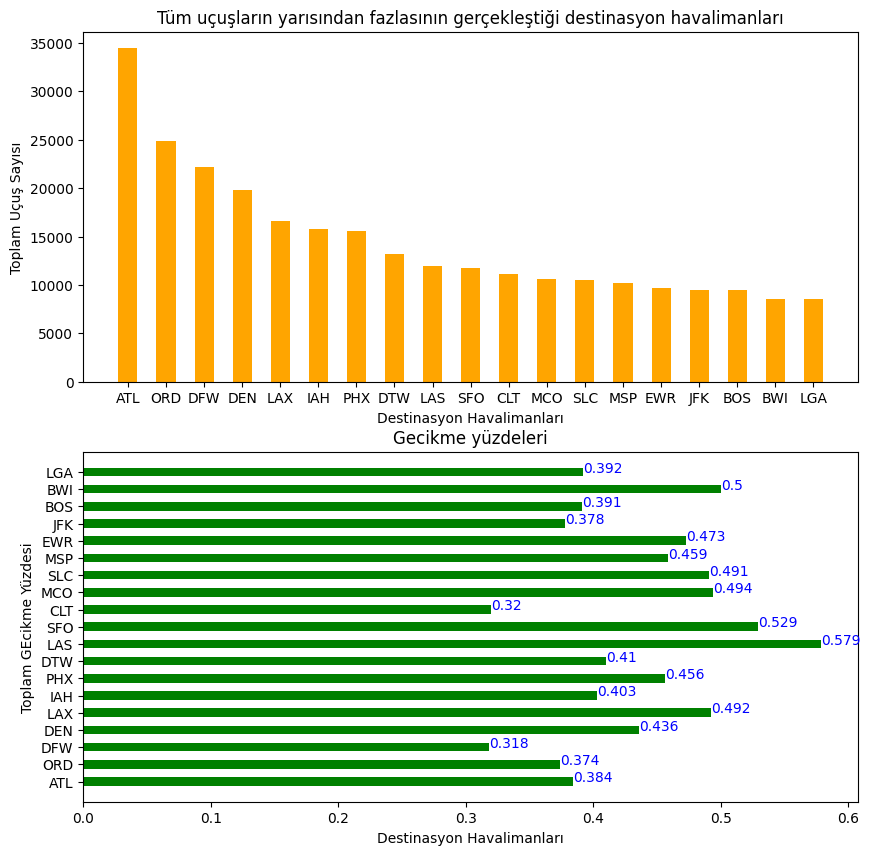

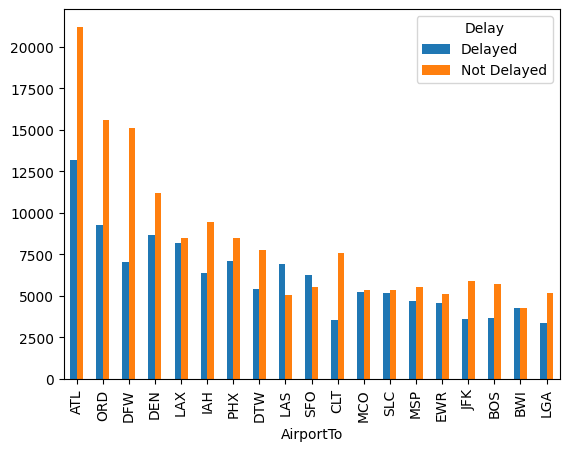

In [61]:
# Tüm uçuşların yarısından fazlasının gerçekleştirildiği aktif destinasyon havayolları için grafik çizimleri
active=total_flights_by_airportTo.loc[total_flights_by_airportTo["cum_percentage"]<=0.51].set_index("AirportTo")

fig2, (ax1, ax3,) = plt.subplots(2, 1)
fig2.set_size_inches(10, 10)

ax1.bar(active.index, active["Total_flight"], width, color = "orange")
ax1.set(xlabel="Destinasyon Havalimanları", ylabel="Toplam Uçuş Sayısı")
ax1.set_title("Tüm uçuşların yarısından fazlasının gerçekleştiği destinasyon havalimanları") 

ax3.barh(pivot_delay_by_airportTo.loc[active.index].index, pivot_delay_by_airportTo.loc[active.index]["delay_fraction"], width, color = "green")
ax3.set(xlabel="Destinasyon Havalimanları", ylabel="Toplam GEcikme Yüzdesi")
for i, v in enumerate(pivot_delay_by_airportTo.loc[active.index]["delay_fraction"].round(decimals = 3)):
    ax3.text(v, i , str(v),color = 'blue', ha="left")
ax3.set_title("Gecikme yüzdeleri")


pivot_delay_by_airportTo.loc[active.index].reset_index().plot(x="AirportTo", y=["Delayed", "Not Delayed"], kind="bar")
plt.show()


en fazla geciken uçuş sayısının gerçekleştiği destinasyon havalimanı 13.217 uçuş ile ATL havalimanıdır. ATLye gerçekleştirilen uçuşların %38.37si geç kalmıştır. 

In [62]:
# Geç kalan uçuşların yarısından fazlası hangi havalimanlarına gerçekleştirilmiştir? 
pivot_delay_by_airportTo=pivot_delay_by_airportTo.sort_values(by="total_delay_percentage", ascending= False)
pivot_delay_by_airportTo["total_delay_percentage_cum"]=pivot_delay_by_airportTo["total_delay_percentage"].cumsum()
print("Geç kalan uçuşların  %", round(pivot_delay_by_airportTo.loc[pivot_delay_by_airportTo["total_delay_percentage_cum"]<0.5].tail(1).iat[0,4]*100,3), "293 havalimanından ",len(pivot_delay_by_airportTo.loc[pivot_delay_by_airportTo["total_delay_percentage_cum"]<0.5]) ,"adet havalimanına uçmuştur.")
print("Bu destinasyon havalimaları geciken uçuş sayıları azalan şekilde: ",list(pivot_delay_by_airportTo.loc[pivot_delay_by_airportTo["total_delay_percentage_cum"]<0.5].index))

Geç kalan uçuşların  % 49.152 293 havalimanından  19 adet havalimanına uçmuştur.
Bu destinasyon havalimaları geciken uçuş sayıları azalan şekilde:  ['ATL', 'ORD', 'DEN', 'LAX', 'PHX', 'DFW', 'LAS', 'IAH', 'SFO', 'DTW', 'MCO', 'SLC', 'MSP', 'EWR', 'MDW', 'BWI', 'SEA', 'SAN', 'BOS']


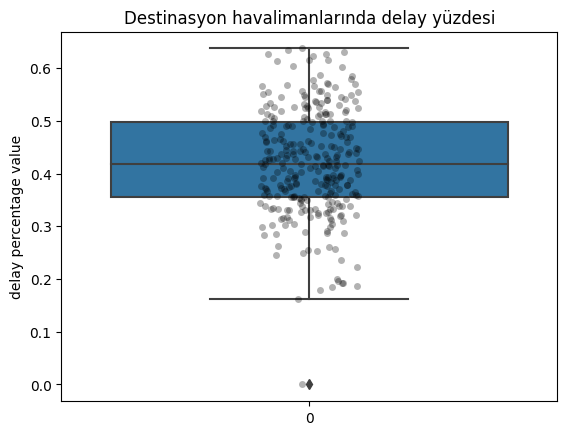

old shape (293, 5)
old mean: 0.42080771252405097
fence_low: 0.14050808023643346
fence_high: 0.7120564254123959
indexes removed because of low outliers: AirportTo
ADK    0.0
Name: delay_fraction, dtype: float64
indexes removed because of high outliers: Series([], Name: delay_fraction, dtype: float64)
new shape (292, 5)
new mean: 0.42224883482721554


In [63]:
# Destinasyon havalimanları için ortalama uçuşların % kaçı gecikmektedir? 
# Ortalama değerini anlamsızlaştıran outlier bir havalimanı var mı?
box_plot2= sns.boxplot(pivot_delay_by_airportTo["delay_fraction"])
box_plot2= sns.stripplot(pivot_delay_by_airportTo["delay_fraction"], marker="o", alpha=0.3, color="black")
box_plot2.axes.set_title("Destinasyon havalimanlarında delay yüzdesi", fontsize=12)
box_plot2.set_xlabel("")
box_plot2.set_ylabel("delay percentage value")
plt.show()
remove_outlier(pivot_delay_by_airportTo, "delay_fraction")

Destinasyon havalimanına gerçekleşen uçuşların ortalama %42si geç kalmaktadır. Outlier konumundaki tek havalimanı hiçbir uçuşu geç kalmayan ADK havalimanıdır. 

In [64]:
# Her bir destinasyon havalimanı için hangi havayolları uçuş gerçekleştirmektedir? 
# Gerçekleştirilen uçuş sayısı nedir ve ne kadarı geç kalmaktadır? 
delay_by_airline_airportTo= data.groupby(["AirportTo","Airline", "Delay"]).agg(total_x=("Airline","count")).reset_index()
pivot_delay_by_airline_airportTo= delay_by_airline_airportTo.pivot_table(values="total_x",index=(["AirportTo","Airline"]), columns="Delay").replace(np.nan,0)
pivot_delay_by_airline_airportTo["delay_fraction"]=pivot_delay_by_airline_airportTo["Delayed"]/(pivot_delay_by_airline_airportTo["Delayed"]+ pivot_delay_by_airline_airportTo["Not Delayed"])
pivot_delay_by_airline_airportTo.head()

Delay              Delayed  Not Delayed  delay_fraction
AirportTo Airline                                      
ABE       9E          43.0         42.0        0.505882
          EV          17.0         14.0        0.548387
          FL          12.0         36.0        0.250000
          MQ          39.0         48.0        0.448276
          US           9.0         22.0        0.290323

In [65]:
pivot_delay_by_airline_airportTo.loc["DTW"]

Delay    Delayed  Not Delayed  delay_fraction
Airline                                      
9E        1682.0       2563.0        0.396231
AA          74.0        137.0        0.350711
CO          68.0         55.0        0.552846
DL        1939.0       2644.0        0.423085
EV         336.0        395.0        0.459644
F9          51.0         37.0        0.579545
FL          55.0        111.0        0.331325
MQ         135.0        205.0        0.397059
OH         383.0       1177.0        0.245513
OO          43.0         39.0        0.524390
UA          13.0         20.0        0.393939
US          78.0        156.0        0.333333
WN         394.0         82.0        0.827731
XE         108.0        100.0        0.519231
YV          33.0         33.0        0.500000

In [66]:
# En fazla gecikmenin yaşandığı havalimanına uçuş gerçekleştiren havayolu şirketleri hangileridir? 
print("En fazla geciken uçuş gerçekleşen destiansyon havalimanı ",pivot_delay_by_airportTo.sort_values(by="Delayed", ascending= False).head(1).index)
print("""Bu havalimanına en fazla sayıda geciken uçuş gerçekleştiren hava yolu firmaları :""")
pivot_delay_by_airline_airportTo.loc[pivot_delay_by_airportTo.sort_values(by="Delayed", ascending= False).head(1).index].sort_values(by="Delayed", ascending= False).head(3) 

En fazla geciken uçuş gerçekleşen destiansyon havalimanı  Index(['ATL'], dtype='object', name='AirportTo')
Bu havalimanına en fazla sayıda geciken uçuş gerçekleştiren hava yolu firmaları :


Delay              Delayed  Not Delayed  delay_fraction
AirportTo Airline                                      
ATL       DL        6229.0       9004.0        0.408915
          EV        3871.0       5885.0        0.396781
          FL        1631.0       3984.0        0.290472

In [67]:
print("""Bu havalimanına en yüksek ORANDA geciken uçuş gerçekleştiren hava yolu firması:""")
pivot_delay_by_airline_airportTo.loc[pivot_delay_by_airportTo.sort_values(by="Delayed", ascending= False).head(1).index].sort_values(by="delay_fraction", ascending= False).head(1) 

Bu havalimanına en yüksek ORANDA geciken uçuş gerçekleştiren hava yolu firması:


Delay              Delayed  Not Delayed  delay_fraction
AirportTo Airline                                      
ATL       OO          47.0         37.0        0.559524

en fazla geciken uçuş sayısının gerçekleştiği destinasyon havalimanı 13.217 uçuş ile ATL havalimanı olduğu ve bu havalimanına gerçekleştirilen uçuşların %38.37si geç kaldığı bilgisine ulaşılmıştı. 
Geç kalan uçuşların 6229 adedi DL hava yollarından kaynaklanmaktadır. Bu havayolunun bu hava limanına gerçekleştirdiği uçuşların %40.8 i geç kalmaktadır. 
Bu havalimanına gerçekleştirdiği uçuşların en fazla oranda geç kaldığı havalimanı ise %55.95 ile OO hava yollarıdır. 

In [68]:
# Her bir havalimanına en fazla uçuş gerçekleştiren 3 havayolu şirketi hangileridir?
Top_AirportTo_Airline=top(data, "AirportTo", "Airline", 3 ).copy(deep=True)
Top_AirportTo_Airline.head()

top_1_Airline top_2_Airline top_3_Airline
AirportTo                                          
ABE             MQ / 87       9E / 85       FL / 48
ABI            MQ / 211           NaN           NaN
ABQ           WN / 1583      OO / 402      AA / 243
ABR              9E / 2           NaN           NaN
ABY             EV / 87           NaN           NaN

In [69]:
print("ABQ havalimanına en fazla uçuş gerçekleştiren 3 havayolu firması ve uçuş sayıları sırasıyla ",
      Top_AirportTo_Airline.loc["ABQ"]["top_1_Airline"],", ", Top_AirportTo_Airline.loc["ABQ"]["top_2_Airline"], "ve ",
       Top_AirportTo_Airline.loc["ABQ"]["top_3_Airline"], " havayolu şirketleridir")

ABQ havalimanına en fazla uçuş gerçekleştiren 3 havayolu firması ve uçuş sayıları sırasıyla  WN / 1583 ,  OO / 402 ve  AA / 243  havayolu şirketleridir


In [70]:
# Hangi havalimanlarına sadece tek bir havayolu şirketi tarafından uçuş gerçekleşmektedir? 
x= Top_AirportTo_Airline[Top_AirportTo_Airline['top_2_Airline'].isna()]
print("Tek bir havayolu şirketi tarafından uçuş gerçekleşen destinasyon havalimanı sayısı", len(x), "ve toplam havalimanı sayısı içindeki oranı %",round(len(x)*100/data["AirportTo"].nunique(),3) )
x.head()

Tek bir havayolu şirketi tarafından uçuş gerçekleşen destinasyon havalimanı sayısı 98 ve toplam havalimanı sayısı içindeki oranı % 33.447


top_1_Airline top_2_Airline top_3_Airline
AirportTo                                          
ABI            MQ / 211           NaN           NaN
ABR              9E / 2           NaN           NaN
ABY             EV / 87           NaN           NaN
ACT             MQ / 59           NaN           NaN
ACV            OO / 295           NaN           NaN

In [71]:
# Her bir havalimanına en fazla geciken uçuş gerçekleştiren 3 havayolu şirketi hangileridir? 
Top_Delayed_AirportTo_Airline=top(data[data["Delay"]=="Delayed"], "AirportTo", "Airline", 3 ).copy(deep=True)
Top_Delayed_AirportTo_Airline.head()

top_1_Airline top_2_Airline top_3_Airline
AirportTo                                          
ABE             9E / 43       MQ / 39       EV / 17
ABI             MQ / 70           NaN           NaN
ABQ           WN / 1175      OO / 179       AA / 97
ABR              9E / 1           NaN           NaN
ABY             EV / 27           NaN           NaN

In [72]:
print("ABQ havalimanına en fazla sayıda gecikmiş uçuş gerçekleştiren 3 havayolu firması ve geciken uçuş sayıları sırasıyla ",
      Top_Delayed_AirportTo_Airline.loc["ABQ"]["top_1_Airline"],", ", Top_Delayed_AirportTo_Airline.loc["ABQ"]["top_2_Airline"], "ve ",
       Top_Delayed_AirportTo_Airline.loc["ABQ"]["top_3_Airline"], " havayolu şirketleridir")

ABQ havalimanına en fazla sayıda gecikmiş uçuş gerçekleştiren 3 havayolu firması ve geciken uçuş sayıları sırasıyla  WN / 1175 ,  OO / 179 ve  AA / 97  havayolu şirketleridir


In [73]:
# Hangi havalimanlarına sadece tek bir havayolu şirketi tarafından gerçekleştirilen uçuş gecikmiştir?
x= Top_Delayed_AirportTo_Airline[Top_Delayed_AirportTo_Airline['top_2_Airline'].isna()]
print("Geciken uçuşları tek bir havayolundan kaynaklanan destinasyon havalimanı sayısı", len(x), "ve toplam havalimanı sayısı içindeki oranı %",round(len(x)*100/data["AirportTo"].nunique(),3) )
x.head()

Geciken uçuşları tek bir havayolundan kaynaklanan destinasyon havalimanı sayısı 97 ve toplam havalimanı sayısı içindeki oranı % 33.106


top_1_Airline top_2_Airline top_3_Airline
AirportTo                                          
ABI             MQ / 70           NaN           NaN
ABR              9E / 1           NaN           NaN
ABY             EV / 27           NaN           NaN
ACT             MQ / 17           NaN           NaN
ACV            OO / 164           NaN           NaN

In [74]:
# Rota Matrisini oluşturunuz.. 
pd.crosstab(data['AirportFrom'], data['AirportTo'], margins=True)

AirportTo    ABE  ABI   ABQ  ABR  ABY  ACT  ACV  ACY  ADK  ADQ  ...  TYR  \
AirportFrom                                                     ...        
ABE            0    0     0    0    0    0    0    0    0    0  ...    0   
ABI            0    0     0    0    0    0    0    0    0    0  ...    0   
ABQ            0    0     0    0    0    0    0    0    0    0  ...    0   
ABR            0    0     0    0    0    0    0    0    0    0  ...    0   
ABY            0    0     0    0    0    0    0    0    0    0  ...    0   
...          ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
WRG            0    0     0    0    0    0    0    0    0    0  ...    0   
XNA            0    0     0    0    0    0    0    0    0    0  ...    0   
YAK            0    0     0    0    0    0    0    0    0    0  ...    0   
YUM            0    0     0    0    0    0    0    0    0    0  ...    0   
All          305  211  2800    2   87   59  295   62    9   56  ...   60   

AirportTo     TYS  UTM  VLD  VPS  WRG   XNA  YAK  YUM     All  
AirportFrom                                                    
ABE             0    0    0    0    0     0    0    0     342  
ABI             0    0    0    0    0     0    0    0     211  
ABQ             0    0    0    0    0     0    0    0    2799  
ABR             0    0    0    0    0     0    0    0       2  
ABY             0    0    0    0    0     0    0    0      87  
...           ...  ...  ...  ...  ...   ...  ...  ...     ...  
WRG             0    0    0    0    0     0    0    0      59  
XNA             0    0    0    0    0     0    0    0    1128  
YAK             0    0    0    0    0     0    0    0      57  
YUM             0    0    0    0    0     0    0    0     338  
All          1192   18   87  633   59  1123   57  338  539383  

[294 rows x 294 columns]

In [75]:
# Her bir havalimanına en fazla uçuş gerçekleştiren 3 havalimanı şirketi hangileridir?
Top_AirportTo_AirportFrom=top(data, "AirportTo", "AirportFrom", 3 ).copy(deep=True)
Top_AirportTo_AirportFrom.head()

top_1_AirportFrom top_2_AirportFrom top_3_AirportFrom
AirportTo                                                      
ABE               ORD / 110          DTW / 85          ATL / 31
ABI               DFW / 211               NaN               NaN
ABQ               PHX / 411         DFW / 243         DAL / 234
ABR                 MSP / 2               NaN               NaN
ABY                ATL / 87               NaN               NaN

In [76]:
print("ABQ havalimanına en fazla uçak kalkan 3 havalimanı ve uçuş sayıları sırasıyla ",
      Top_AirportTo_AirportFrom.loc["ABQ"]["top_1_AirportFrom"],", ", Top_AirportTo_AirportFrom.loc["ABQ"]["top_2_AirportFrom"], "ve ",
       Top_AirportTo_AirportFrom.loc["ABQ"]["top_3_AirportFrom"], " havalimanlarıdır")

ABQ havalimanına en fazla uçak kalkan 3 havalimanı ve uçuş sayıları sırasıyla  PHX / 411 ,  DFW / 243 ve  DAL / 234  havalimanlarıdır


In [77]:
# Hangi havalimanlarına sadece tek bir havalimanından uçak kalkmaktadır
x= Top_AirportTo_AirportFrom[Top_AirportTo_AirportFrom['top_2_AirportFrom'].isna()]
print("Tek bir havalimanından uçuş alan havalimanı sayısı", len(x), "ve toplam havalimanı sayısı içindeki oranı %",round(len(x)*100/data["AirportTo"].nunique(),3) )
x.head()

Tek bir havalimanından uçuş alan havalimanı sayısı 62 ve toplam havalimanı sayısı içindeki oranı % 21.16


top_1_AirportFrom top_2_AirportFrom top_3_AirportFrom
AirportTo                                                      
ABI               DFW / 211               NaN               NaN
ABR                 MSP / 2               NaN               NaN
ABY                ATL / 87               NaN               NaN
ACT                DFW / 59               NaN               NaN
ACY                ATL / 62               NaN               NaN

In [78]:
# Her bir havalimanı için en fazla geciken uçuş kalkan 3 havalimanı hangisidir? 
Top_Delayed_AirportTo_AirportFrom=top(data[data["Delay"]=="Delayed"], "AirportTo", "AirportFrom", 3 ).copy(deep=True)
Top_Delayed_AirportTo_AirportFrom.head()

top_1_AirportFrom top_2_AirportFrom top_3_AirportFrom
AirportTo                                                      
ABE                ORD / 54          DTW / 43          ATL / 17
ABI                DFW / 70               NaN               NaN
ABQ               DAL / 201         PHX / 185         LAX / 131
ABR                 MSP / 1               NaN               NaN
ABY                ATL / 27               NaN               NaN

In [79]:
print("ABQ havalimanına en fazla sayıda gecikmiş uçuş kalkan 3 havalimanı ve geciken uçuş sayıları sırasıyla ",
      Top_Delayed_AirportTo_AirportFrom.loc["ABQ"]["top_1_AirportFrom"],", ", Top_Delayed_AirportTo_AirportFrom.loc["ABQ"]["top_2_AirportFrom"], "ve ",
       Top_Delayed_AirportTo_AirportFrom.loc["ABQ"]["top_3_AirportFrom"], " havalimanlarıdır")

ABQ havalimanına en fazla sayıda gecikmiş uçuş kalkan 3 havalimanı ve geciken uçuş sayıları sırasıyla  DAL / 201 ,  PHX / 185 ve  LAX / 131  havalimanlarıdır


In [80]:
# Hangi havalimanlarına sadece tek bir havalimanından kalkan uçuş gecikmiştir?
x= Top_Delayed_AirportTo_AirportFrom[Top_Delayed_AirportTo_AirportFrom['top_2_AirportFrom'].isna()]
print("Geciken uçuşların sadece tek bir havalimanından kalkan uçaklardan kaynaklandığı destinasyon havalimanı sayısı", len(x), "ve toplam havalimanı sayısı içindeki oranı %",round(len(x)*100/data["AirportTo"].nunique(),3) )
x.head()

Geciken uçuşların sadece tek bir havalimanından kalkan uçaklardan kaynaklandığı destinasyon havalimanı sayısı 61 ve toplam havalimanı sayısı içindeki oranı % 20.819


top_1_AirportFrom top_2_AirportFrom top_3_AirportFrom
AirportTo                                                      
ABI                DFW / 70               NaN               NaN
ABR                 MSP / 1               NaN               NaN
ABY                ATL / 27               NaN               NaN
ACT                DFW / 17               NaN               NaN
ACY                ATL / 22               NaN               NaN

In [81]:
# Destinasyon havayolları ve DayOfWeek arasında crosstab:
pd.crosstab(data['AirportTo'], data['DayOfWeek'], margins=True)

DayOfWeek  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
AirportTo                                                                   
ABE            45      43        34      38        54       43         48   
ABI            33      28        24      28        35       28         35   
ABQ           434     379       303     367       476      372        469   
ABR             0       0         2       0         0        0          0   
ABY            13      12         8      12        15       12         15   
...           ...     ...       ...     ...       ...      ...        ...   
WRG             9       8         6       8        10        8         10   
XNA           172     161        94     137       201      159        199   
YAK             7       8         6       8        10        8         10   
YUM            54      45        34      46        57       45         57   
All         85248   72769     58956   69879     91445    71340      89746   

DayOfWeek     All  
AirportTo          
ABE           305  
ABI           211  
ABQ          2800  
ABR             2  
ABY            87  
...           ...  
WRG            59  
XNA          1123  
YAK            57  
YUM           338  
All        539383  

[294 rows x 8 columns]

In [82]:
# Pazartesi günü en fazla uçuş alan havalimanı ve diğer günlerde gerçekleşen uçuş sayıları nelerdir? 
print("Pazartesi günü en fazla uçuş alan havalimanı ", pd.crosstab(data['AirportTo'], data['DayOfWeek'], margins=True).sort_values(by="Monday", ascending=False).iloc[2])

Pazartesi günü en fazla uçuş alan havalimanı  DayOfWeek
Friday        3895
Monday        3360
Saturday      2714
Sunday        3209
Thursday      4187
Tuesday       3327
Wednesday     4179
All          24871
Name: ORD, dtype: int64


In [83]:
# Havayolu şirketlerinin günlere göre zamanında gerçekleşen uçuş sayıları, geç kalan uçuş sayıları nedir?
AirportTo_DayOfWeek=data.groupby(["AirportTo","DayOfWeek","Delay"]).agg(total_number=("Airline","count")).reset_index()
pivot_AirportTo_DayOfWeek=AirportTo_DayOfWeek.pivot_table(values="total_number",index=(["AirportTo","DayOfWeek"]), columns=("Delay")).replace(np.nan,0)
pivot_AirportTo_DayOfWeek["delay_fraction"]=pivot_AirportTo_DayOfWeek["Delayed"]/(pivot_AirportTo_DayOfWeek["Not Delayed"]+pivot_AirportTo_DayOfWeek["Delayed"])
pivot_AirportTo_DayOfWeek

Delay                Delayed  Not Delayed  delay_fraction
AirportTo DayOfWeek                                      
ABE       Friday        20.0         25.0        0.444444
          Monday        13.0         30.0        0.302326
          Saturday      14.0         20.0        0.411765
          Sunday        14.0         24.0        0.368421
          Thursday      22.0         32.0        0.407407
...                      ...          ...             ...
YUM       Saturday      10.0         24.0        0.294118
          Sunday        15.0         31.0        0.326087
          Thursday       8.0         49.0        0.140351
          Tuesday        9.0         36.0        0.200000
          Wednesday     15.0         42.0        0.263158

[2033 rows x 3 columns]

In [84]:
# Tüm uçuşların geç kaldığı destinasyon havalimanı ve günler hangileridir? 
pivot_AirportTo_DayOfWeek[pivot_AirportTo_DayOfWeek["delay_fraction"]==1]

Delay                Delayed  Not Delayed  delay_fraction
AirportTo DayOfWeek                                      
FLO       Wednesday      3.0          0.0             1.0
GUM       Friday         2.0          0.0             1.0
          Wednesday      2.0          0.0             1.0
MMH       Tuesday        2.0          0.0             1.0
PIE       Tuesday        2.0          0.0             1.0
SJT       Saturday       2.0          0.0             1.0

In [85]:
# Havayolu şirketlerinin hangi günlerde geç kalan uçuş sayısı, zamanında gerçekleşen uçuş sayısından fazladır? 
pivot_AirportTo_DayOfWeek[pivot_AirportTo_DayOfWeek["delay_fraction"]>0.5].sort_values(by="delay_fraction", ascending=False)

Delay                Delayed  Not Delayed  delay_fraction
AirportTo DayOfWeek                                      
GUM       Wednesday      2.0          0.0        1.000000
MMH       Tuesday        2.0          0.0        1.000000
SJT       Saturday       2.0          0.0        1.000000
FLO       Wednesday      3.0          0.0        1.000000
GUM       Friday         2.0          0.0        1.000000
...                      ...          ...             ...
SJU       Monday       117.0        116.0        0.502146
          Sunday       129.0        128.0        0.501946
LAX       Monday      1116.0       1109.0        0.501573
OMA       Wednesday    167.0        166.0        0.501502
SNA       Monday       244.0        243.0        0.501027

[512 rows x 3 columns]

In [86]:
# Her bir havalimanına en fazla uçuş gerçekleştiren 3 gün hangileridir?
Top_AirportTo_DayOfWeek=top(data, "AirportTo", "DayOfWeek", 3 ).copy(deep=True)
Top_AirportTo_DayOfWeek.head()

top_1_DayOfWeek  top_2_DayOfWeek top_3_DayOfWeek
AirportTo                                                 
ABE         Thursday / 54   Wednesday / 48     Friday / 45
ABI         Thursday / 35   Wednesday / 35     Friday / 33
ABQ        Thursday / 476  Wednesday / 469    Friday / 434
ABR          Saturday / 2              NaN             NaN
ABY         Thursday / 15   Wednesday / 15     Friday / 13

In [87]:
print("ABQ havalimanına en fazla uçuş gerçekleştirilen 3 gün ve uçuş sayıları sırasıyla ",
      Top_AirportTo_DayOfWeek.loc["ABQ"]["top_1_DayOfWeek"],", ", Top_AirportTo_DayOfWeek.loc["ABQ"]["top_2_DayOfWeek"], "ve ",
       Top_AirportTo_DayOfWeek.loc["ABQ"]["top_3_DayOfWeek"], " havayolu şirketleridir")

ABQ havalimanına en fazla uçuş gerçekleştirilen 3 gün ve uçuş sayıları sırasıyla  Thursday / 476 ,  Wednesday / 469 ve  Friday / 434  havayolu şirketleridir


In [88]:
# Hangi havalimanlarına sadece tek bir gün uçuş gerçekleşmektedir? 
x= Top_AirportTo_DayOfWeek[Top_AirportTo_DayOfWeek['top_2_DayOfWeek'].isna()]
print("Tek bir gün uçuş gerçekleşen destinasyon havalimanı sayısı", len(x), "ve toplam havalimanı sayısı içindeki oranı %",round(len(x)*100/data["AirportTo"].nunique(),3) )
x.head()

Tek bir gün uçuş gerçekleşen destinasyon havalimanı sayısı 1 ve toplam havalimanı sayısı içindeki oranı % 0.341


top_1_DayOfWeek top_2_DayOfWeek top_3_DayOfWeek
AirportTo                                                
ABR          Saturday / 2             NaN             NaN

In [89]:
# Her bir havalimanına en fazla geciken uçuş gerçekleştirilen 3 gün hangileridir? 
Top_Delayed_AirportTo_DayOfWeek=top(data[data["Delay"]=="Delayed"], "AirportTo", "DayOfWeek", 3 ).copy(deep=True)
Top_Delayed_AirportTo_DayOfWeek.head()

top_1_DayOfWeek top_2_DayOfWeek top_3_DayOfWeek
AirportTo                                                 
ABE           Tuesday / 26  Wednesday / 26   Thursday / 22
ABI         Wednesday / 18   Thursday / 13     Monday / 12
ABQ        Wednesday / 288  Thursday / 287    Friday / 252
ABR           Saturday / 1             NaN             NaN
ABY           Thursday / 6      Monday / 5      Sunday / 5

In [90]:
print("ABQ havalimanına en fazla sayıda gecikmiş uçuş gerçekleştirilen 3 gün ve geciken uçuş sayıları sırasıyla ",
      Top_Delayed_AirportTo_DayOfWeek.loc["ABQ"]["top_1_DayOfWeek"],", ", Top_Delayed_AirportTo_DayOfWeek.loc["ABQ"]["top_2_DayOfWeek"], "ve ",
       Top_Delayed_AirportTo_DayOfWeek.loc["ABQ"]["top_3_DayOfWeek"], " günleridir")

ABQ havalimanına en fazla sayıda gecikmiş uçuş gerçekleştirilen 3 gün ve geciken uçuş sayıları sırasıyla  Wednesday / 288 ,  Thursday / 287 ve  Friday / 252  günleridir


In [91]:
# Hangi havalimanlarına sadece tek bir gün uçuş gecikmiştir?
x= Top_Delayed_AirportTo_DayOfWeek[Top_Delayed_AirportTo_DayOfWeek['top_2_DayOfWeek'].isna()]
print("Geciken uçuşları tek bir gün olan destinasyon havalimanı sayısı", len(x), "ve toplam havalimanı sayısı içindeki oranı %",round(len(x)*100/data["AirportTo"].nunique(),3) )
x.head()

Geciken uçuşları tek bir gün olan destinasyon havalimanı sayısı 1 ve toplam havalimanı sayısı içindeki oranı % 0.341


top_1_DayOfWeek top_2_DayOfWeek top_3_DayOfWeek
AirportTo                                                
ABR          Saturday / 1             NaN             NaN

In [92]:
# Destinasyon havayolları ve Time arasında crosstab:
pd.crosstab(data['AirportTo'], data['Time'], margins=True)

Time       0-1AM  1-2AM  2-3AM  3-4AM  4-5AM  4-6AM  6-7AM  7-8AM  8-9AM  \
AirportTo                                                                  
ABE            0      0      0      0      0      0      0     16     47   
ABI            0      0      0      0      0      0      0      0      0   
ABQ           10      0      0      0      0     23     78    180    217   
ABR            0      0      0      0      0      0      0      0      0   
ABY            0      0      0      0      0      0      0      0      0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
WRG            0      0      0      0      0      0      0      0     30   
XNA            0      0      0      0      0      0     17      9    125   
YAK            0      0      0      0      0      0      0      0      0   
YUM            0      0      0      0      0     30      1      0      0   
All          871    292     74     31    257  15435  34719  34261  37175   

Time       9-10AM  ...  3-4PM  4-5PM  4-6PM  6-7PM  7-8PM  8-9PM  9-10PM  \
AirportTo          ...                                                     
ABE             0  ...     46     10      2      0      2     87      26   
ABI            31  ...      0     31     31     26     30     30       0   
ABQ           194  ...    277    188    207    131    205     99     108   
ABR             0  ...      2      0      0      0      0      0       0   
ABY            30  ...     29      0      0      0      0     28       0   
...           ...  ...    ...    ...    ...    ...    ...    ...     ...   
WRG             0  ...     29      0      0      0      0      0       0   
XNA            61  ...    166     77     91     78    122     40      25   
YAK             0  ...      0     28      0      0      0      0       0   
YUM            59  ...      0     29     29      4      2     39      17   
All         32940  ...  32949  34798  36057  30560  31966  19572   13893   

Time       10-11PM  11-12PM     All  
AirportTo                            
ABE              0        0     305  
ABI              0        0     211  
ABQ             29        0    2800  
ABR              0        0       2  
ABY              0        0      87  
...            ...      ...     ...  
WRG              0        0      59  
XNA             30        0    1123  
YAK              0        0      57  
YUM             29       10     338  
All           7040     1972  539383  

[294 rows x 25 columns]

In [93]:
# 0-1AM saatlerinde en fazla uçuş alan havalimanı hangisidir? 
print("0-1AM saatlerinde en fazla uçuş alan havalimanı ", pd.crosstab(data['AirportTo'], data["Time"], margins=True).sort_values(by="0-1AM", ascending=False).iloc[2])

0-1AM saatlerinde en fazla uçuş alan havalimanı  Time
0-1AM        119
1-2AM          0
2-3AM          0
3-4AM          0
4-5AM          0
4-6AM       1035
6-7AM       2065
7-8AM       1562
8-9AM       1497
9-10AM      1409
10-11AM     1521
11-12AM     1507
0-1PM       1561
1-2PM       1378
2-3PM       1251
3-4PM       1579
4-5PM       1610
4-6PM       1235
6-7PM       1493
7-8PM        821
8-9PM        327
9-10PM        88
10-11PM       64
11-12PM       31
All        22153
Name: DFW, dtype: int64


In [94]:
# Havayolu şirketlerinin saat dilimlerin göre zamanında gerçekleşen uçuş sayıları, geç kalan uçuş sayıları nedir?
AirportTo_Time=data.groupby(["AirportTo","Time","Delay"]).agg(total_number=("Airline","count")).reset_index()
pivot_AirportTo_Time=AirportTo_Time.pivot_table(values="total_number",index=(["AirportTo","Time"]), columns=("Delay")).replace(np.nan,0)
pivot_AirportTo_Time["delay_fraction"]=pivot_AirportTo_Time["Delayed"]/(pivot_AirportTo_Time["Not Delayed"]+pivot_AirportTo_Time["Delayed"])
pivot_AirportTo_Time

Delay              Delayed  Not Delayed  delay_fraction
AirportTo Time                                         
ABE       0-1AM          0            0             NaN
          1-2AM          0            0             NaN
          2-3AM          0            0             NaN
          3-4AM          0            0             NaN
          4-5AM          0            0             NaN
...                    ...          ...             ...
YUM       7-8PM          0            2        0.000000
          8-9PM         11           28        0.282051
          9-10PM         8            9        0.470588
          10-11PM        6           23        0.206897
          11-12PM        3            7        0.300000

[7032 rows x 3 columns]

In [95]:
# Havayolu şirketlerinin hangi saat dilimlerinde tüm uçuşları geç kalmaktdır? 
pivot_AirportTo_Time[pivot_AirportTo_Time["Not Delayed"]==0][pivot_AirportTo_Time["Delayed"]>0].sort_values(by="Delayed", ascending=False).head()

/var/folders/3y/c9lwb6z95057gd1r37nc5hj80000gn/T/ipykernel_43279/1993993972.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Delay            Delayed  Not Delayed  delay_fraction
AirportTo Time                                       
AMA       4-5PM       31            0             1.0
GEG       0-1PM       24            0             1.0
MAF       3-4PM        8            0             1.0
          1-2PM        8            0             1.0
HRL       8-9PM        8            0             1.0

In [96]:
# Her bir havalimanına en fazla uçuş gerçekleştirilen saat dilimleri hangileridir?
Top_AirportTo_Time=top(data, "AirportTo", "Time", 3 ).copy(deep=True)
Top_AirportTo_Time.head()

top_1_Time     top_2_Time       top_3_Time
AirportTo                                               
ABE         8-9PM / 87.0   8-9AM / 47.0     3-4PM / 46.0
ABI        9-10AM / 31.0   0-1PM / 31.0     4-5PM / 31.0
ABQ        3-4PM / 277.0  8-9AM / 217.0  11-12AM / 212.0
ABR          3-4PM / 2.0            NaN              NaN
ABY        9-10AM / 30.0   3-4PM / 29.0     8-9PM / 28.0

In [97]:
print("ABQ havalimanına en fazla uçuş gerçekleştirilen 3 saat dilimi ve uçuş sayıları sırasıyla ",
      Top_AirportTo_Time.loc["ABQ"]["top_1_Time"],", ", Top_AirportTo_Time.loc["ABQ"]["top_2_Time"], "ve ",
       Top_AirportTo_Time.loc["ABQ"]["top_3_Time"], " saat dilimlkeridir")

ABQ havalimanına en fazla uçuş gerçekleştirilen 3 saat dilimi ve uçuş sayıları sırasıyla  3-4PM / 277.0 ,  8-9AM / 217.0 ve  11-12AM / 212.0  saat dilimlkeridir


In [98]:
# Hangi havalimanlarına sadece tek bir saat diliminde uçuş gerçekleşmektedir? 
x= Top_AirportTo_Time[Top_AirportTo_Time['top_2_Time'].isna()]
print("Tek bir saat diliminde uçuş gerçekleşen destinasyon havalimanı sayısı", len(x), "ve toplam havalimanı sayısı içindeki oranı %",round(len(x)*100/data["AirportTo"].nunique(),3) )
x.head()

Tek bir saat diliminde uçuş gerçekleşen destinasyon havalimanı sayısı 12 ve toplam havalimanı sayısı içindeki oranı % 4.096


top_1_Time top_2_Time top_3_Time
AirportTo                                      
ABR           3-4PM / 2.0        NaN        NaN
ADK           2-3PM / 9.0        NaN        NaN
BLI          1-2PM / 26.0        NaN        NaN
CLL        10-11AM / 31.0        NaN        NaN
CYS        10-11AM / 31.0        NaN        NaN

In [99]:
# Her bir havalimanına en fazla geciken uçuşun gerçekleştiği saat dilimleri hangileridir? 
Top_Delayed_AirportTo_Time=top(data[data["Delay"]=="Delayed"], "AirportTo", "Time", 3 ).copy(deep=True)
Top_Delayed_AirportTo_Time.head()

top_1_Time       top_2_Time     top_3_Time
AirportTo                                               
ABE         8-9PM / 32.0     8-9AM / 28.0   2-3PM / 24.0
ABI        9-10AM / 15.0     6-7PM / 13.0   4-5PM / 10.0
ABQ        3-4PM / 196.0  11-12AM / 138.0  4-6PM / 136.0
ABR          3-4PM / 1.0              NaN            NaN
ABY         3-4PM / 11.0     9-10AM / 8.0    8-9PM / 8.0

In [100]:
print("ABQ havalimanına en fazla sayıda gecikmiş uçuş gerçekleştiği saat dilimleri ve geciken uçuş sayıları sırasıyla ",
      Top_Delayed_AirportTo_Time.loc["ABQ"]["top_1_Time"],", ", Top_Delayed_AirportTo_Time.loc["ABQ"]["top_2_Time"], "ve ",
       Top_Delayed_AirportTo_Time.loc["ABQ"]["top_3_Time"], " saat dilimleridir")

ABQ havalimanına en fazla sayıda gecikmiş uçuş gerçekleştiği saat dilimleri ve geciken uçuş sayıları sırasıyla  3-4PM / 196.0 ,  11-12AM / 138.0 ve  4-6PM / 136.0  saat dilimleridir


Havayolu şirketlerinde kalkış havalimanı ile varış havalimanınları birbiri ile aynıdır. 
Bu nedenle kalkış havalimanı sayısı, isimleri, uçuş sayıları hesaplanmamıştır. 

In [101]:
# Kalkış hava alanı bazlı uçuşlarda geç kalış miktarları nedir?
delay_by_airportFrom=data.groupby(["AirportFrom","Delay"]).agg(total_number=("AirportFrom","count")).reset_index()
pivot_delay_by_airportFrom= delay_by_airportFrom.pivot_table(values="total_number",index="AirportFrom",columns="Delay").replace(np.nan,0)
pivot_delay_by_airportFrom["delay_fraction"]=pivot_delay_by_airportFrom["Delayed"]/(pivot_delay_by_airportFrom["Delayed"]+ pivot_delay_by_airportFrom["Not Delayed"])
pivot_delay_by_airportFrom.sort_values(by="delay_fraction", ascending= True).head()
pivot_delay_by_airportFrom.head()

Delay        Delayed  Not Delayed  delay_fraction
AirportFrom                                      
ABE              110          232        0.321637
ABI               32          179        0.151659
ABQ             1375         1424        0.491247
ABR                1            1        0.500000
ABY               22           65        0.252874

Tüm uçuşların yarısından fazlasının gerçekleştiği aktif havalimanları "active" dataframei ile tanımlanmıştı. 

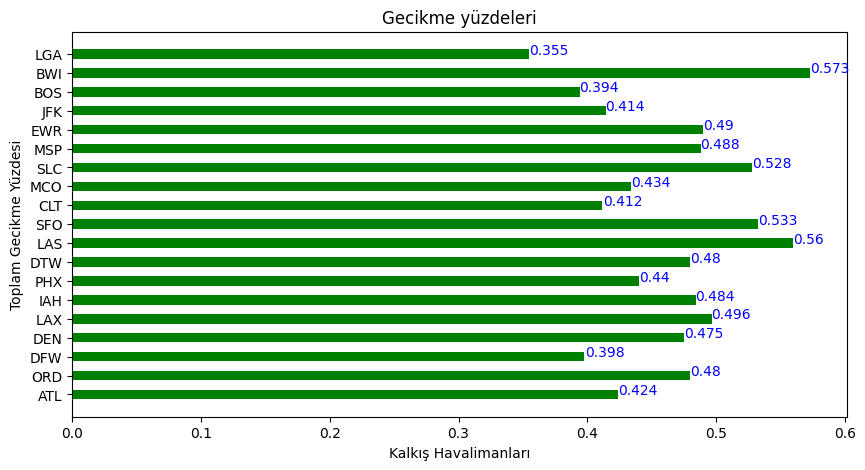

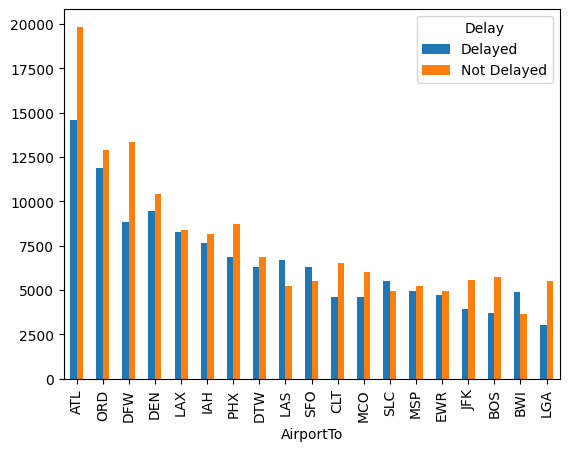

In [102]:
fig3, ax1 = plt.subplots(1, 1)
fig3.set_size_inches(10, 5)

ax1.barh(pivot_delay_by_airportFrom.loc[active.index].index, pivot_delay_by_airportFrom.loc[active.index]["delay_fraction"], width, color = "green")
ax1.set(xlabel="Kalkış Havalimanları", ylabel="Toplam Gecikme Yüzdesi")
for i, v in enumerate(pivot_delay_by_airportFrom.loc[active.index]["delay_fraction"].round(decimals = 3)):
    ax1.text(v, i , str(v),color = 'blue', ha="left")
ax1.set_title("Gecikme yüzdeleri")

pivot_delay_by_airportFrom.loc[active.index].reset_index().plot(x="AirportTo", y=["Delayed", "Not Delayed"], kind="bar")
plt.show()

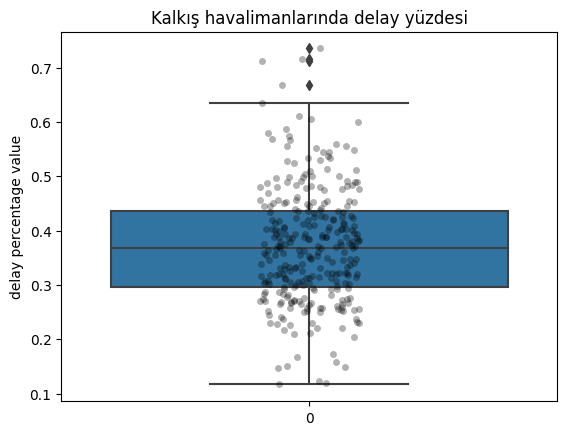

old shape (293, 3)
old mean: 0.3719254381763475
fence_low: 0.08562522918958562
fence_high: 0.6474147414741473
indexes removed because of low outliers: Series([], Name: delay_fraction, dtype: float64)
indexes removed because of high outliers: AirportFrom
DAL    0.715998
HOU    0.667195
MDW    0.735182
OAK    0.712926
Name: delay_fraction, dtype: float64
new shape (289, 3)
new mean: 0.36727630565264224


In [103]:
# Kalkış havalimanları için ortalama kaç uçuş geç kalmaktadır? 
# Ortalamayı anlamsızlaştıran kalkış havalimanları hangileridir?
box_plot4= sns.boxplot(pivot_delay_by_airportFrom["delay_fraction"])
box_plot4= sns.stripplot(pivot_delay_by_airportFrom["delay_fraction"], marker="o", alpha=0.3, color="black")
box_plot4.axes.set_title("Kalkış havalimanlarında delay yüzdesi", fontsize=12)
box_plot4.set_xlabel("")
box_plot4.set_ylabel("delay percentage value")
plt.show()
remove_outlier(pivot_delay_by_airportFrom, "delay_fraction")

Listedeki havalimanlarında her 100 uçuştan 42 si ortalama olarak gecikmektedir. Outlier konumundaki havalimanları DAL, HOU, MDW ve OAK havalimanlarıdır. Bu havalimanları istatistiksel analizlere dahil edilmediğinde her 100 uçuştan 36.72si ortalama olarak gecikmektedir.

In [104]:
# Her bir kalkış havalimanından hangi havayolları uçuş gerçekleştirmektedir? 
# Gerçekleştirilen uçuş sayısı nedir ve ne kadarı geç kalmaktadır? 
delay_by_airline_airportFrom= data.groupby(["AirportFrom","Airline", "Delay"]).agg(total_x=("Airline","count")).reset_index()
pivot_delay_by_airline_airportFrom= delay_by_airline_airportFrom.pivot_table(values="total_x",index=(["AirportFrom","Airline"]), columns="Delay").replace(np.nan,0)
pivot_delay_by_airline_airportFrom["delay_fraction"]=pivot_delay_by_airline_airportFrom["Delayed"]/(pivot_delay_by_airline_airportFrom["Delayed"]+pivot_delay_by_airline_airportFrom["Not Delayed"])
pivot_delay_by_airline_airportFrom.head()

Delay                Delayed  Not Delayed  delay_fraction
AirportFrom Airline                                      
ABE         9E          40.0         45.0        0.470588
            EV           7.0         24.0        0.225806
            FL          13.0         35.0        0.270833
            MQ          29.0         58.0        0.333333
            US           2.0         29.0        0.064516

In [105]:
pivot_delay_by_airline_airportFrom.loc["DTW"]

Delay    Delayed  Not Delayed  delay_fraction
Airline                                      
9E        2050.0       2215.0        0.480657
AA          67.0        144.0        0.317536
CO          46.0         78.0        0.370968
DL        2480.0       2095.0        0.542077
EV         418.0        324.0        0.563342
F9          37.0         51.0        0.420455
FL          64.0        101.0        0.387879
MQ         138.0        202.0        0.405882
OH         429.0       1099.0        0.280759
OO          38.0         45.0        0.457831
UA           4.0         29.0        0.121212
US          62.0        172.0        0.264957
WN         354.0        122.0        0.743697
XE          81.0        126.0        0.391304
YV          32.0         33.0        0.492308

In [106]:
# En fazla gecikmenin yaşandığı havalimanından uçuş gerçekleştiren havayolu şirketleri hangileridir? 
print("En fazla geciken uçuş kalkan havalimanı ",pivot_delay_by_airportFrom.sort_values(by="Delayed", ascending= False).head(1).index)
print("""Bu havalimanından en fazla sayıda geciken uçuş gerçekleştiren hava yolu firmaları :""")
pivot_delay_by_airline_airportFrom.loc[pivot_delay_by_airportFrom.sort_values(by="Delayed", ascending= False).head(1).index].sort_values(by="Delayed", ascending= False).head(3) 

En fazla geciken uçuş kalkan havalimanı  Index(['ATL'], dtype='object', name='AirportFrom')
Bu havalimanından en fazla sayıda geciken uçuş gerçekleştiren hava yolu firmaları :


Delay                Delayed  Not Delayed  delay_fraction
AirportFrom Airline                                      
ATL         DL        7173.0       8060.0        0.470886
            EV        4106.0       5657.0        0.420567
            FL        1952.0       3670.0        0.347207

In [107]:
print("""Bu havalimanından en yüksek ORANDA geç uçuş gerçekleştiren hava yolu firması:""")
pivot_delay_by_airline_airportFrom.loc[pivot_delay_by_airportFrom.sort_values(by="Delayed", ascending= False).head(1).index].sort_values(by="delay_fraction", ascending= False).head(1)

Bu havalimanından en yüksek ORANDA geç uçuş gerçekleştiren hava yolu firması:


Delay                Delayed  Not Delayed  delay_fraction
AirportFrom Airline                                      
ATL         F9          41.0         46.0        0.471264

In [108]:
# Havalimanlarını giden ve gelen olma durumunda geciken uçuş sayılarına göre kıyaslayınız. 
airportFromToCompare= pd.merge(pivot_delay_by_airportFrom, pivot_delay_by_airportTo, left_index=True, right_index=True,suffixes=('_From', '_To'))
airportFromToCompare.head()

Delay  Delayed_From  Not Delayed_From  delay_fraction_From  Delayed_To  \
ABE             110               232             0.321637       135.0   
ABI              32               179             0.151659        70.0   
ABQ            1375              1424             0.491247      1643.0   
ABR               1                 1             0.500000         1.0   
ABY              22                65             0.252874        27.0   

Delay  Not Delayed_To  delay_fraction_To  total_delay_percentage  \
ABE             170.0           0.442623                0.000562   
ABI             141.0           0.331754                0.000291   
ABQ            1157.0           0.586786                0.006838   
ABR               1.0           0.500000                0.000004   
ABY              60.0           0.310345                0.000112   

Delay  total_delay_percentage_cum  
ABE                      0.966703  
ABI                      0.987901  
ABQ                      0.768292  
ABR                      1.000000  
ABY                      0.997461

ABE havalimanı için; bu havalimanından kalkan uçuşların 110 adedi geç kalırken gelen uçuşların 135 adedi geç kalmıştır. Kalkan uçuşlarda gecikem oranı %32.16 iken gelen uçuşlarda %44.26dır. 

In [109]:
#  Hangi havalimanları için giden havalimanı iken gerçekleşen geciken uçuş ortalaması gelen havalimanı ikenden fazladır? 
airportFromToCompare[airportFromToCompare["delay_fraction_From"]>airportFromToCompare["delay_fraction_To"]].head()

Delay  Delayed_From  Not Delayed_From  delay_fraction_From  Delayed_To  \
ADK               5                 4             0.555556         0.0   
ADQ              18                38             0.321429        16.0   
ATL           14601             19848             0.423844     13217.0   
AVL             172               254             0.403756       148.0   
BET              46                38             0.547619        22.0   

Delay  Not Delayed_To  delay_fraction_To  total_delay_percentage  \
ADK               9.0           0.000000                0.000000   
ADQ              40.0           0.285714                0.000067   
ATL           21223.0           0.383769                0.055010   
AVL             279.0           0.346604                0.000616   
BET              62.0           0.261905                0.000092   

Delay  total_delay_percentage_cum  
ADK                      1.000000  
ADQ                      0.999118  
ATL                      0.055010  
AVL                      0.963852  
BET                      0.998264

## DAYOFWEEK FEATURE

In [110]:
# Verisetinde hangi günler uçuş gerçekleştirilmiştir?
names_of_DayOfWeek= data["DayOfWeek"].unique()
names_of_DayOfWeek

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

Thursday     91445
Wednesday    89746
Friday       85248
Monday       72769
Tuesday      71340
Sunday       69879
Saturday     58956
Name: DayOfWeek, dtype: int64

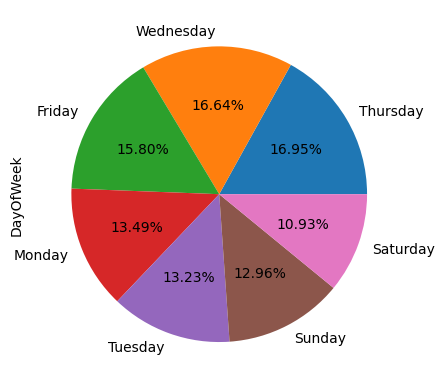

In [111]:
# Günlere göre toplam gerçekleştirilen uçuş sayısı nedir? 
total_flights_by_DayOfWeek=data["DayOfWeek"].value_counts()
total_flights_by_DayOfWeek.plot(kind="pie", autopct='%01.02f%%')
total_flights_by_DayOfWeek

Uçuşlar en çok Perşembe günü gerçekleşmiştir.

In [112]:
# Günlere göre havayolu firmaları tarafından gerçekleştirilen uçuş sayısı nedir?
total_daily_flights_by_airline = data.groupby(["DayOfWeek","Airline"]).agg(daily_flight=("DayOfWeek","count")).reset_index()
total_daily_flights_by_airline.head()

DayOfWeek Airline  daily_flight
0    Friday      9E          3147
1    Friday      AA          7058
2    Friday      AS          1825
3    Friday      B6          3018
4    Friday      CO          3431

In [113]:
# Günlere ve havayollarına göre uçuş sayılarına ait grafik
trace=go.Bar(x=total_daily_flights_by_airline["DayOfWeek"],y=total_daily_flights_by_airline["daily_flight"],text=total_daily_flights_by_airline["Airline"],textposition="inside")
data1=[trace]
layout1=dict(title="Daily Flights by Each Airline",title_x=0.5,xaxis=dict(title="Days"),yaxis=dict(title="Total Number"))
fig1=dict(data=data1,layout=layout1)
offline.iplot(fig1)

H0 is rejected. There is a relation between  DayOfWeek and Delay


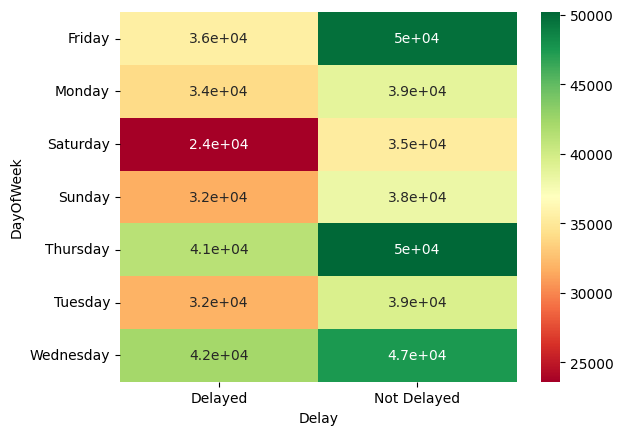

In [114]:
# Uçuş günü ile uçuşların geç kalması arasında ilişki var mıdır?
chi_square(data, "DayOfWeek", "Delay", prob=0.95)

Heat mapten görüldüğü üzere ve hipotez testi sonucuna göre, uçuş günü ile uçuşun gecikmesi arasında anlamlı bir ilişki mevcuttur. 

In [115]:
# Gün bazlı geciken ve zamanında gerçekleşen uçuş sayıları nelerdir?
delay_by_DayOfWeek=data.groupby(["DayOfWeek","Delay"]).agg(total_number=("Airline","count")).reset_index()
pivot_delay_by_DayOfWeek= delay_by_DayOfWeek.pivot_table(values="total_number",index="DayOfWeek",columns="Delay").replace(np.nan,0)

pivot_delay_by_DayOfWeek

Delay      Delayed  Not Delayed
DayOfWeek                      
Friday       35515        49733
Monday       34030        38739
Saturday     23615        35341
Sunday       31693        38186
Thursday     41244        50201
Tuesday      31913        39427
Wednesday    42254        47492

<AxesSubplot: xlabel='DayOfWeek', ylabel='count'>

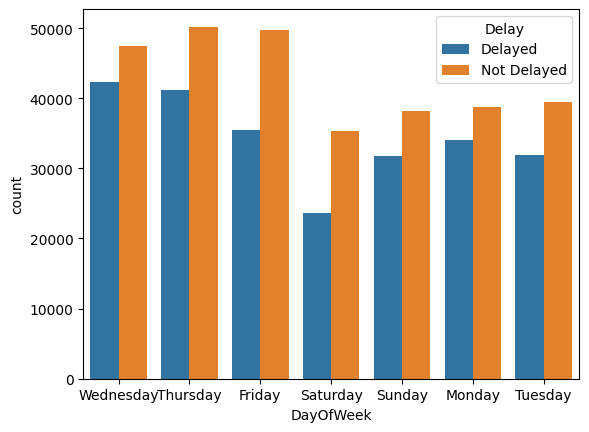

In [116]:
sns.countplot(data=data,x="DayOfWeek",hue='Delay')

Uçuşlar en fazla sayıda Çarşamba günü geç kalmıştır. En az ise Cumartesi günleridir.

In [117]:
# Her bir gün için hangi havayolları uçuş gerçekleştirmektedir? 
# Gerçekleştirilen uçuş sayısı nedir ve ne kadarı geç kalmaktadır? 
delay_by_airline_DayOfWeek= data.groupby(["DayOfWeek","Airline", "Delay"]).agg(total_x=("Airline","count")).reset_index()
pivot_delay_by_airline_DayOfWeek= delay_by_airline_DayOfWeek.pivot_table(values="total_x",index=(["DayOfWeek","Airline"]), columns="Delay").replace(np.nan,0)
pivot_delay_by_airline_DayOfWeek["delay_fraction"]=pivot_delay_by_airline_DayOfWeek["Delayed"]/(pivot_delay_by_airline_DayOfWeek["Delayed"]+ pivot_delay_by_airline_DayOfWeek["Not Delayed"])
pivot_delay_by_airline_DayOfWeek.head()

Delay              Delayed  Not Delayed  delay_fraction
DayOfWeek Airline                                      
Friday    9E          1162         1985        0.369241
          AA          2584         4474        0.366109
          AS           639         1186        0.350137
          B6          1311         1707        0.434394
          CO          1812         1619        0.528126

In [118]:
# En fazla gecikmenin yaşandığı Çarşamba günü hangi havayollarının kaç adet uçuşu vardır? 
# Bu uçuşlardan kaç tanesi geç kalmıştır? 
pivot_delay_by_airline_DayOfWeek.loc["Wednesday"].head()

Delay    Delayed  Not Delayed  delay_fraction
Airline                                      
9E          1422         2067        0.407567
AA          3162         4379        0.419308
AS           644         1238        0.342189
B6          1543         1276        0.547357
CO          2179         1214        0.642205

In [119]:
# Günlere göre en fazla uçuş gerçekleştiren 3 havayolu şirketi hangileridir?
Top_DayOfWeek_Airline=top(data, "DayOfWeek", "Airline", 3 ).copy(deep=True)
Top_DayOfWeek_Airline

top_1_Airline top_2_Airline top_3_Airline
DayOfWeek                                          
Friday       WN / 14393     DL / 9763     OO / 7788
Monday       WN / 12808     DL / 8233     OO / 6796
Saturday      WN / 9791     DL / 6544     OO / 5531
Sunday       WN / 12061     DL / 7952     OO / 6614
Thursday     WN / 16118    DL / 10363     OO / 8475
Tuesday      WN / 12808     DL / 7979     OO / 6632
Wednesday    WN / 16118    DL / 10106     OO / 8418

Tüm günler için top havayolu firmalarının aynı olduğu görülmüştür. Hergün en fazla uçul WN havayolu tarafından, ikinci sırada DL havayolu tarafından gerçekleştirilmektedir. 

In [120]:
# Günlere göre en fazla geciken uçuş gerçekleştiren 3 havayolu şirketi hangileridir? 
Top_Delayed_DayOfWeek_Airline=top(data[data["Delay"]=="Delayed"], "DayOfWeek", "Airline", 3 ).copy(deep=True)
Top_Delayed_DayOfWeek_Airline

top_1_Airline top_2_Airline top_3_Airline
DayOfWeek                                          
Friday        WN / 9894     DL / 3901     OO / 3497
Monday        WN / 9300     DL / 4211     OO / 3190
Saturday      WN / 6237     OO / 2479     DL / 2326
Sunday        WN / 7848     DL / 3919     OO / 3201
Thursday     WN / 11721     DL / 4645     OO / 3823
Tuesday       WN / 8805     DL / 3681     OO / 2800
Wednesday    WN / 11852     DL / 4769     OO / 3770

En fazla sayıda geciken uçuş gerçekleştiren havayolu firması hergün WN havayollarıdır. İkinci ve üçüncü sıra DL ve OO havayolları arasında değişmekytedir. 

In [121]:
# Her bir gün için hangi saat dilimlerinde uçuş gerçekleştirmektedir? 
# Gerçekleştirilen uçuş sayısı nedir ve ne kadarı geç kalmaktadır? 
delay_by_Time_DayOfWeek= data.groupby(["DayOfWeek","Time", "Delay"]).agg(total_x=("Airline","count")).reset_index()
pivot_delay_by_Time_DayOfWeek= delay_by_Time_DayOfWeek.pivot_table(values="total_x",index=(["DayOfWeek","Time"]), columns="Delay").replace(np.nan,0)
pivot_delay_by_Time_DayOfWeek.head()

Delay            Delayed  Not Delayed
DayOfWeek Time                       
Friday    0-1AM       68           94
          1-2AM       27           24
          2-3AM        5            8
          3-4AM        2            3
          4-5AM       14           34

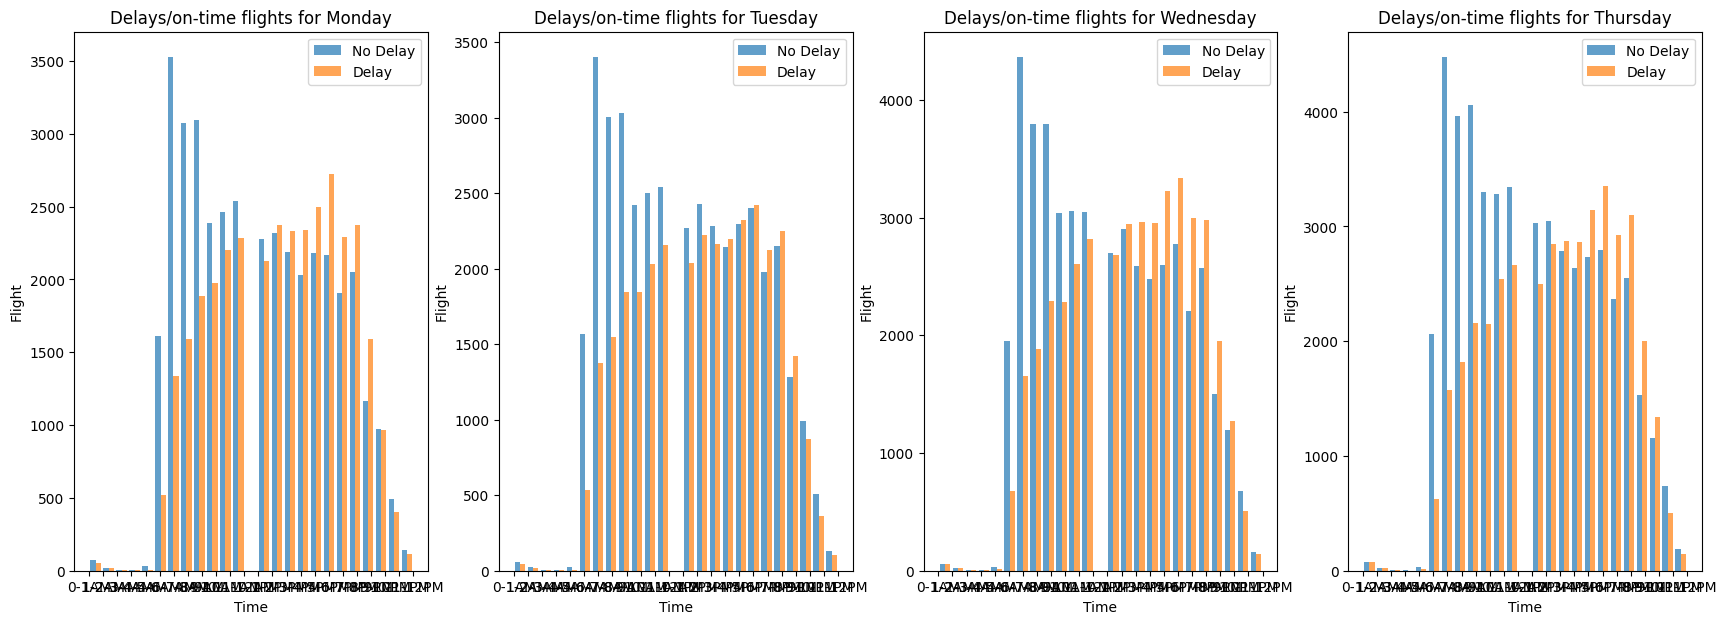

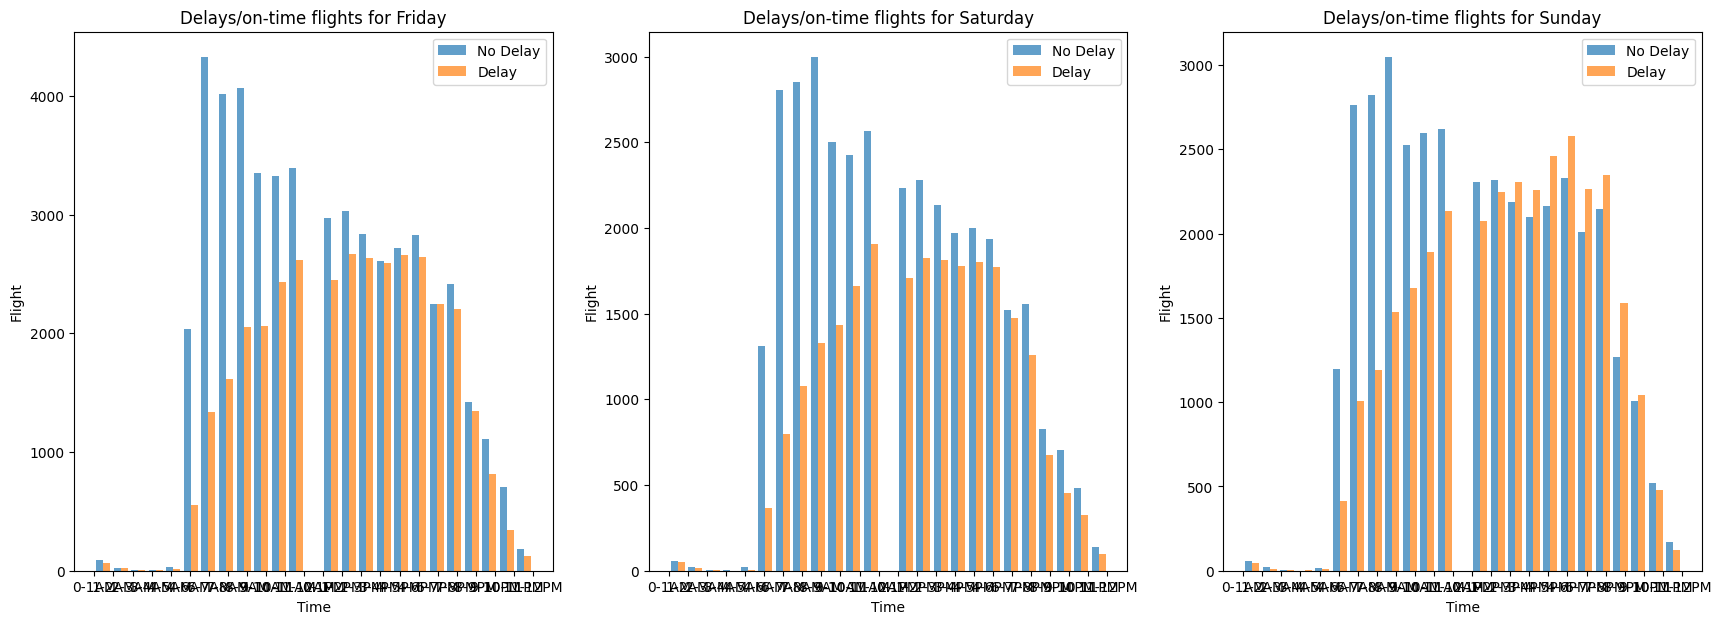

In [122]:
# figure, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(4, 2)

day1=data[data["DayOfWeek"]=="Monday"]
day2=data[data["DayOfWeek"]=="Tuesday"]
day3=data[data["DayOfWeek"]=="Wednesday"]
day4=data[data["DayOfWeek"]=="Thursday"]
day5=data[data["DayOfWeek"]=="Friday"]
day6=data[data["DayOfWeek"]=="Saturday"]
day7=data[data["DayOfWeek"]=="Sunday"]

figure1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.hist([day1["Time"][day1["Delay"] == "Not Delayed"], day1["Time"][day1["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax1.set(xlabel="Time", ylabel="Flight")
ax1.set_title("Delays/on-time flights for Monday")
ax1.legend()

ax2.hist([day2["Time"][day2["Delay"] == "Not Delayed"], day2["Time"][day2["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax2.set(xlabel="Time", ylabel="Flight")
ax2.set_title("Delays/on-time flights for Tuesday")
ax2.legend()

ax3.hist([day3["Time"][day3["Delay"] == "Not Delayed"], day3["Time"][day3["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax3.set(xlabel="Time", ylabel="Flight")
ax3.set_title("Delays/on-time flights for Wednesday")
ax3.legend()

ax4.hist([day4["Time"][day4["Delay"] == "Not Delayed"], day4["Time"][day4["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax4.set(xlabel="Time", ylabel="Flight")
ax4.set_title("Delays/on-time flights for Thursday")
ax4.legend()

figure1.set_size_inches(21, 7)

figure2, (ax5, ax6, ax7) = plt.subplots(1, 3)
ax5.hist([day5["Time"][day5["Delay"] == "Not Delayed"], day5["Time"][day5["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax5.set(xlabel="Time", ylabel="Flight")
ax5.set_title("Delays/on-time flights for Friday")
ax5.legend()

ax6.hist([day6["Time"][day6["Delay"] == "Not Delayed"], day6["Time"][day6["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax6.set(xlabel="Time", ylabel="Flight")
ax6.set_title("Delays/on-time flights for Saturday")
ax6.legend()

ax7.hist([day7["Time"][day7["Delay"] == "Not Delayed"], day7["Time"][day7["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax7.set(xlabel="Time", ylabel="Flight")
ax7.set_title("Delays/on-time flights for Sunday")
ax7.legend()
figure2.set_size_inches(21, 7)
plt.show()


Tüm günlerde, sabah saatlerinde geciken uçuş sayısı az iken akşam saatlerinden sonra artış yaşandığı gözlemlenmektedir. 

## "TIME" FEATURE 

H0 is rejected. There is a relation between  Time and Delay


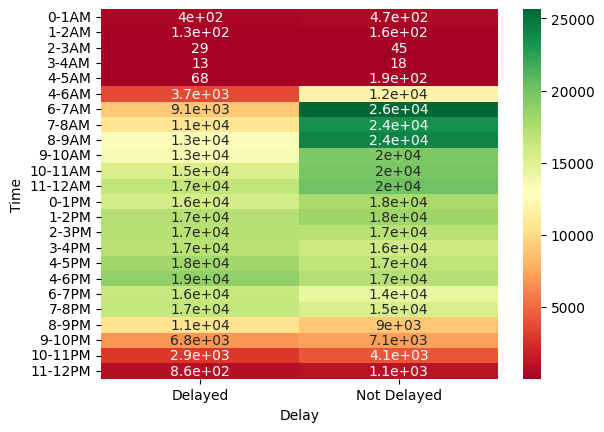

In [123]:
# Uçuş saati ile uçuşların geç kalması arasında ilişki var mıdır?
chi_square(data, "Time", "Delay", prob=0.95)

Uçuş saati ile uçuşun geç kalması arasında anlamlı bir ilişki bulunmuştur

In [124]:
# Saatlere göre geciken ve zamanında gerçekleşen uçuş sayıları nelerdir?
delay_by_Time=data.groupby(["Time","Delay"]).agg(total_number=("Airline","count")).reset_index()
pivot_delay_by_Time= delay_by_Time.pivot_table(values="total_number",index="Time",columns="Delay").replace(np.nan,0)
pivot_delay_by_Time.sort_values(by="Delayed", ascending=False).head()

Delay  Delayed  Not Delayed
Time                       
4-6PM    18831        17226
4-5PM    18109        16689
1-2PM    17138        18317
2-3PM    17092        16995
3-4PM    16984        15965

In [125]:
# En fazla gecikmenin yaşandığı saat dilimi nedir? 
pivot_delay_by_Time.sort_values(by="Delayed", ascending=False).head(1)

Delay  Delayed  Not Delayed
Time                       
4-6PM    18831        17226

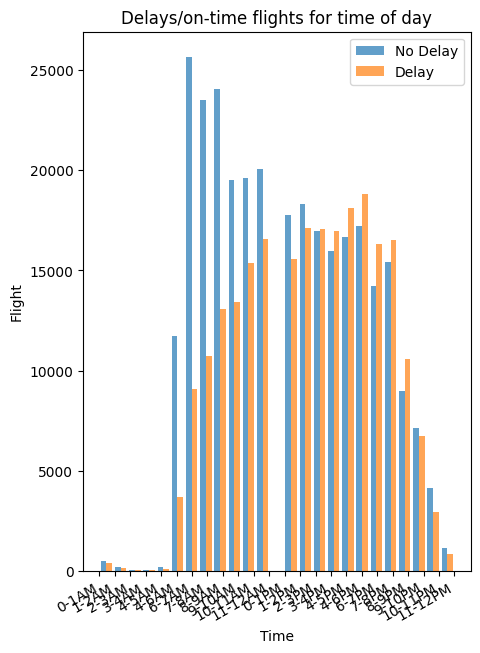

In [126]:
figure, ax1 = plt.subplots(1, 1)
ax1.hist([data["Time"][data["Delay"] == "Not Delayed"], data["Time"][data["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax1.set(xlabel="Time", ylabel="Flight")
ax1.set_title("Delays/on-time flights for time of day")
ax1.legend()
figure.set_size_inches(5, 7)
plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
plt.show()

Zaman grafiği incelendiğinde uçuş sayısının 6AM'den sonra artmaya başladığını ama gecikemelerin 12Pmden sonra arttığı görülmektedir. Öğleden sonraki uçuşlarda 9PMe kadar gecikme artarak devam etmektedir. 

## "LENGTH" FEATURE 

H0 is rejected. There is a relation between  Length and Delay


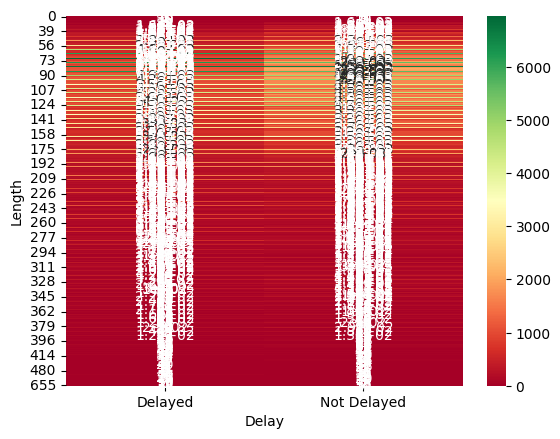

In [127]:
# Uçuş mesafesi ile uçuşların geç kalması arasında ilişki var mıdır?
chi_square(data, "Length", "Delay", prob=0.95)

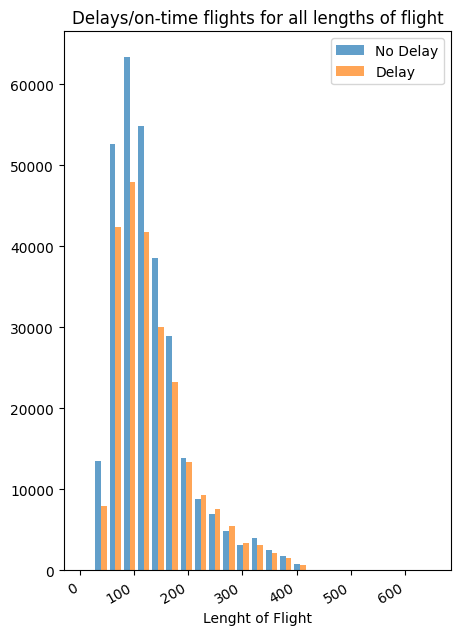

In [128]:
figure, ax1 = plt.subplots(1, 1)
ax1.hist([data["Length"][data["Delay"] == "Not Delayed"], data["Length"][data["Delay"] == "Delayed"]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax1.set(xlabel="Lenght of Flight")
ax1.set_title("Delays/on-time flights for all lengths of flight")
ax1.legend()
figure.set_size_inches(5, 7)
plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
plt.show()

En fazla uçuş 100-200 bandındaki mesafeler için gerçekleşmiştir. 
Mesafe arttıkça geciken uçuş sayısı, zamanında gerçekleşen uçuş sayısını geçmektedir. 

# LOGISTICS REGRESSION

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

Tune edilecek parametreler: solver,  penalty ve C olarak belirlenmiştir.

Solver is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.
lbfgs relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.
sag faster than other solvers for large datasets, when both the number of samples and the number of features are large.
saga the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.
newton-cg computationally expensive because of the Hessian Matrix.
liblinearrecommended when you have a high dimension dataset - solving large-scale classification problems.

Penalty: Default olarak “l2” gelmektedir.
'none': no penalty is added;
'l2': add a L2 penalty term and it is the default choice;
'l1': add a L1 penalty term;
'elasticnet': both L1 and L2 penalty terms are added.

C (or regularization strength) must be a positive float. Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.

Lojistik regresyonda tüm veriler sayısal olmalı ve normalize edilmiş olmalıdır. Kategorik değişkenler için dummy variable tanımlanabilir. Çok fazla değişkeni olan featurelarda dummy variable kullanmak feature sayısını ciddi anlamda arttırmakta ve "curse of dimesionality" problemine neden olmaktadır.

In [129]:
data_LR = pd.read_csv('Airlines.csv')

In [130]:
# Kategorik değişkenlerin one-hot-encoding yöntemiyle 0 ve 1 olarak tanımlanması
data_LR=pd.get_dummies(data_LR,columns = ["DayOfWeek","Airline"])

AirportTo ve AirportFrom featurelar için yukarıda yapılan analizlerde gerçekleşen uçuşların yarısından fazlasının sadece 19 havalimanına gerçekleştirildiği bulunmuştu. Bu havalimanlarına ait bilgiler "active" dataframeinde saklanmıştı. 

"Curse of dimensionality" problemi ile karşılaşmamak için havalimanlarından bazıları "others" olarak tanımlanacaktır. Havalimanları dışa düşenleri incelendiğinde en fazla sayıda uçuş gerçekleştiren havalimanları dışa düşen olarak sınıflandırıldığından dolayı; "others" olarak uçuşların %90ının gerçekleştiren havalimanları alınmıştır. 

In [131]:
active_airports=total_flights_by_airportTo.loc[total_flights_by_airportTo["cum_percentage"]<=0.90].set_index("AirportTo") 
List_not_change=active_airports.index.values.tolist()
data_LR.loc[~data_LR['AirportTo'].isin(List_not_change), 'AirportTo'] = 'others'
data_LR.loc[~data_LR['AirportFrom'].isin(List_not_change), 'AirportFrom'] = 'others'
data_LR=pd.get_dummies(data_LR,columns = ["AirportTo","AirportFrom"])

In [132]:
del data_LR["id"]
del data_LR["Flight"]

Lojistik regresyonda verilerin "scaling" olarak isimlendirilen "normalizasyon ve standardizasyon" proseslerine tabi tutulması modelin performansını ciddi anlamda etkilememektedir.
Bu nedenle veri setine scaling uygulanmayacaktır.

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
* test_size(float or int, default=None): Test edilmek üzere veri setinin kaç adetinin ya da % kaçının kullanılacağı bilgisini içerir. Eğer herhangi bir değer girilmezse kendisini "train_size" ile toplamı 1 olacak şekilde değere eşitler. 

* train_size (float or int, default=None): int ya da float olabilir ve eğitim setinde veri setinin kaç adetinin ya da % kaçının kullanılacağı bilgisini içerir. Eğer herhangi bir değer girilmezse kendisini "train_size" ile toplamı 1 olacak şekilde değere eşitler.

* random_state: Bu hiperparametre, shuffle işlemini kontrol eder. random_state=None ise, makina öğrenimi algoritmasının farklı executionları sırasında farklı eğitim ve test verikümesi elde ederiz ve shuffle işlemi kontrollü değildir. Örneğin 10 satırlı verisetimiz olsun. Training set %70 olarak beilirlensin. Bu durumda 10'un 7li kombinasyonu kadar yani 120 ader training set opsiyonumuz olur. Seçilen random_state değeri ise bu opsiyonlardan birinin seçilmesi ve her algoritmeyı çalıştırmamızda aynı training set ve test set ile çalışmamızı sağlar. Makina öğrenimi algoritmasının başarısını bir çok faktör etkilemektedir. Bunlardan biri de seçilen test ve training setlerinde yer alan verilerdir. Şayet random_state= None seçersek ve hiperparametrelerden birini değiştirip algoritmayı yeniden çalıştırdığımızda algoritmanın performansı daha yüksek çıkmışsa, bu training setteki verilerin değişmesinden mi yoksa hiperparametrenin değişmesinden mi kaynaklanıyor bilinemez :) 

* shuffle (bool, default=True): Bölmeden önce verilerin karıştırılıp karıştırılmayacağını ifade eder. shuffle=False ise, stratify=None olmalıdır.

* stratify (tabakalandırma)(array-like, default=None) : Biased bir veri kümesi olduğunda unbiased hale getimek için kullanılır. Örneğin 20 satırlık bir veri setimi olsun. Output değerlerimizde 16 "yes" ve 4 adet "no" olsun. Training set için 4 adet "no" ve 11 adet "yes" olacak şekilde  verisetinin % 75 ini yani 15 adedi bölünmüş olsun. Test set bu durumda sadece "yes" olan çıktıları içerecektir. Bu ise makina öğrenmesi algoritmasının performansını düşürecektir. Bu durumda stratify=output olmalıdır. Stratify uygularsak; verilerin %75i training set olacaksa 16 adet "yes" outputun da % 75i yani 12 adedi training sette, 4 adedi test sette olmalıdır. "No" ise yine %75 ve %25 olarak ayrılacaktır. 

In [133]:
# Output: y = Uçuşun geç kalıp kalmayacağı bilgisi 
# Girdi seti: X = data_LR da bulunan "Delay" feature hariç tüm featurelar 
X = data_LR.drop(['Delay'], axis=1)
y = data_LR['Delay']
# Test seti= verilerin %30
# random_state = 42 (The Hitchhiker’s Guide to the Galaxy :) 
# shuffle ve Stratify default değerleri olan "True" ve "None" değerlerini alsın.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True, stratify=None)

In [134]:
# default değerler ile lojistik regresyon objectinin oluşturulması 
lr = LogisticRegression(random_state=42)
# Training set ile modelin eğitilmesi 
lr.fit(X_train, y_train)
# Test verilerini kullanarak çıktıyı tahmin etmek 
y_pred = lr.predict(X_test)

In [135]:
# The intercept
print('Interccept: \n', lr.intercept_)
# The coefficients
print(pd.DataFrame(data=lr.coef_,columns=X_train.columns))

Interccept: 
 [-1.41653028]
       Time    Length  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  \
0  0.001207  0.002125    -0.085416    -0.186229     -0.10146    -0.189791   

   DayOfWeek_5  DayOfWeek_6  DayOfWeek_7  Airline_9E  ...  AirportFrom_SLC  \
0    -0.336501    -0.348515    -0.167764    0.087592  ...          0.16571   

   AirportFrom_SMF  AirportFrom_SNA  AirportFrom_STL  AirportFrom_TPA  \
0          0.09114         0.012984         0.112389        -0.326868   

   AirportFrom_TUL  AirportFrom_TUS  AirportFrom_TYS  AirportFrom_XNA  \
0        -0.096624        -0.131265        -0.038518        -0.056248   

   AirportFrom_others  
0           -0.139983  

[1 rows x 207 columns]


R², verilerin yerleştirilmiş regresyon hattına ne kadar yakın olduğunun istatistiksel bir ölçüsüdür. Aynı veri seti için, daha yüksek R² değerleri, gözlemlenen veriler ve fit edilen değerler arasında daha küçük farkları temsil eder. Yüksek R² istenen bir özellik olmasına rağmen; overfittingden de kaynaklanabilir. 

In [136]:
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print("MSE:", mse )
print("R2:", R2)


MSE: 0.3598615703117758
R2: -0.4574708979690556


R² değerinin negatif olması modelin veri trendini yansıtmadığını gösterir 

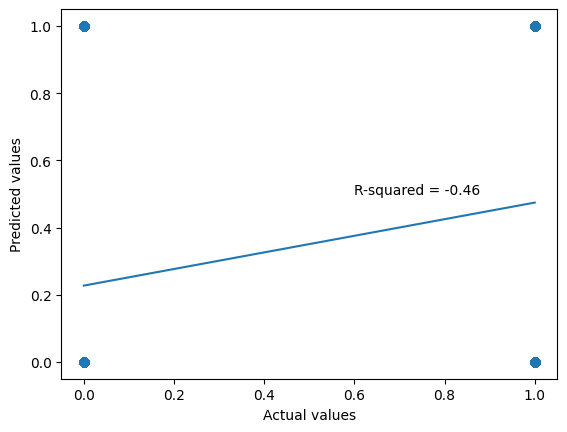

In [137]:
plt.scatter(y_test,y_pred) 
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))

plt.text(0.6, 0.5, 'R-squared = %0.2f' % R2)
plt.show()

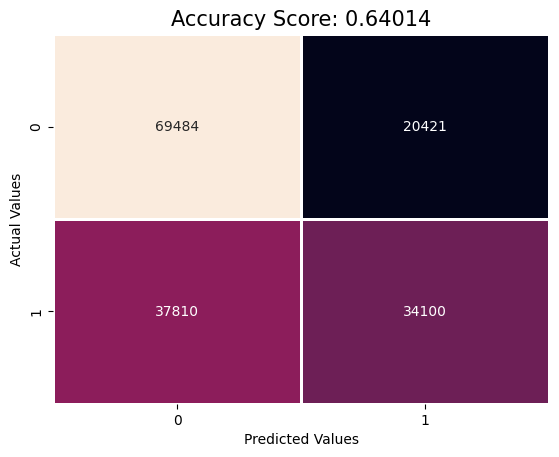

In [138]:
# Confusion matrix oluşturma
score = round(accuracy_score(y_test, y_pred), 5)
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f", lw=2, cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

Doğru tahmin edilen miktar TP = 34100; FP=20421 uçuşu gerçekte geç kalmadığı halde geç kalmış olarak tahmin edildi. TN= 69484 uçuş; gerçekte geç kalmadığı gibi; tahminde de geç kalmadı. FN=37810 uçuş ise gerçekte geç kaldığı halde geç kalmamış olarak tahmin edildi. Bu duurmda 69484+34100 = 103 584 uçuş için yapılan tahminler doğrudur. 68231 uçuş için yanlış tahminlerde bulunulmuştur.       

* Recall (duyarlılık) = Tüm pozitif sınıfların dışında, kaç örnek doğru tahmin edilmiştir? TP/ (TP + FN)
* Precision (kesinlik) = Öngörülen tüm olumlu örneklerden, kaçı  doğru tahmin edilmiştir? TP / ( TP +FP)
* F_score = (2*recall*precision)/(precision+recall)

In [139]:
print(classification_report(y_test, y_pred, target_names=['Not Delayed', 'Delayed']))

              precision    recall  f1-score   support

 Not Delayed       0.65      0.77      0.70     89905
     Delayed       0.63      0.47      0.54     71910

    accuracy                           0.64    161815
   macro avg       0.64      0.62      0.62    161815
weighted avg       0.64      0.64      0.63    161815



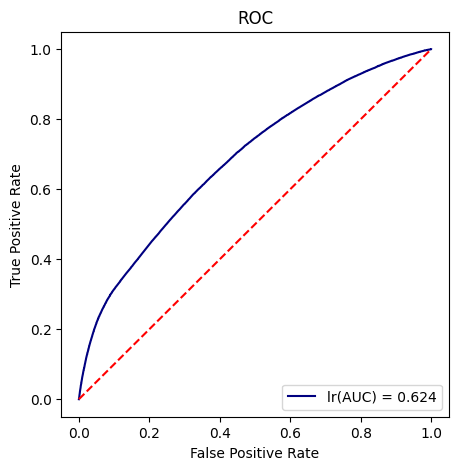

In [140]:
# ROC curve ve AUC değerlerini bulma
plt.figure(figsize=(5,5))
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='lr(AUC) = %0.3f' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Modelin performansı hedeflenen seviyede değildir.
Grid Search ile optimal değerleri bulunmaya çalışılacaktır.

In [141]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [157]:
solvers = ["liblinear","saga"]
penalties = ["l1","l2"]
c_values = [100,10,1]
grid = dict(solver=solvers, penalty=penalties, C=c_values)
grid_search_lr1 = GridSearchCV(estimator=lr, param_grid=grid, cv=10, scoring="accuracy",error_score=0)
grid_result_lr1 = grid_search_lr1.fit(X_train, y_train)

In [158]:
print("Best: %f using %s" % (grid_result_lr1.best_score_, grid_result_lr1.best_params_))
means = grid_result_lr1.cv_results_['mean_test_score']
stds = grid_result_lr1.cv_results_['std_test_score']
params = grid_result_lr1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.643389 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.643312 (0.003058) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.629953 (0.002732) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.643235 (0.003249) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.629955 (0.002734) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.643315 (0.003090) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.629947 (0.002732) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.643325 (0.003182) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.629953 (0.002732) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.643307 (0.003064) with: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.629926 (0.002741) with: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.643389 (0.003249) with: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.629953 (0.002732) with: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


lbfgs solver sadece l2 penalty desteklediği için; bu solver için ayrı grid search uygulanmıştır

In [159]:
solvers2 = ["lbfgs"]
penalties2 = ["l2"] # lpfgs solver sadece l2 penalty kullanabilmektedir
grid2 = dict(solver = solvers2, penalty = penalties2, C = c_values)
grid_search_lr2 = GridSearchCV(estimator = lr, param_grid = grid2, cv=10, scoring="accuracy",error_score=0)
grid_result_lr2 = grid_search_lr2.fit(X_train, y_train)

In [160]:
print("Best: %f using %s" % (grid_result_lr2.best_score_, grid_result_lr2.best_params_))
means2 = grid_result_lr2.cv_results_['mean_test_score']
stds2 = grid_result_lr2.cv_results_['std_test_score']
params2 = grid_result_lr2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.640030 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.638982 (0.003360) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.640030 (0.002698) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.639019 (0.002710) with: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


En iyi sonuç parametresi accuracy = 0.643389 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
En iyi sonucu bulmak için aşağıdaki kodu da uygulayabiliriz:

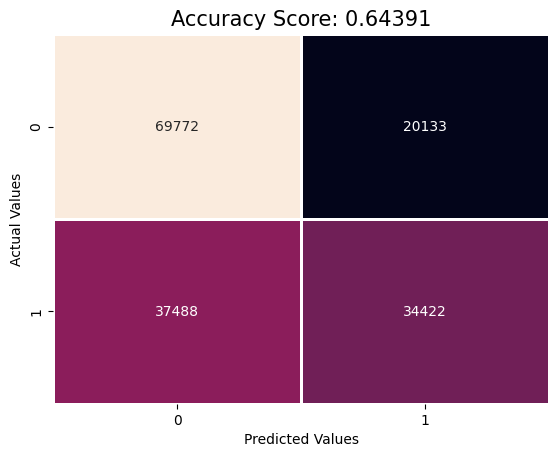

In [161]:
y_pred_best_LR = grid_result_lr1.best_estimator_.predict(X_test)
score_best_LR = round(accuracy_score(y_test, y_pred_best_LR), 5)
cm_best_LR = cm(y_test, y_pred_best_LR)
sns.heatmap(cm_best_LR, annot=True, fmt=".0f", lw=2, cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_best_LR), size = 15)
plt.show()

In [162]:
classification_report_best_LR = classification_report(y_test, y_pred_best_LR, target_names=['Not Delayed', 'Delayed'])
print(classification_report_best_LR)

              precision    recall  f1-score   support

 Not Delayed       0.65      0.78      0.71     89905
     Delayed       0.63      0.48      0.54     71910

    accuracy                           0.64    161815
   macro avg       0.64      0.63      0.63    161815
weighted avg       0.64      0.64      0.64    161815



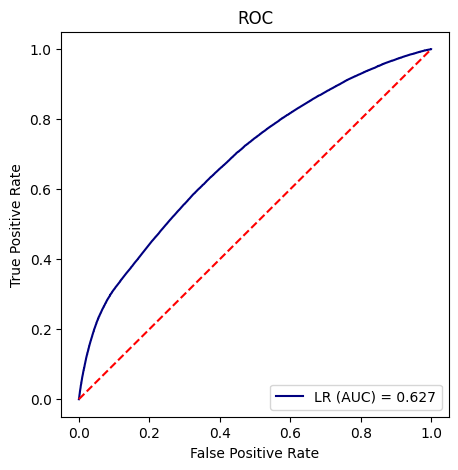

In [163]:
# ROC curve ve AUC değerlerini bulma
plt.figure(figsize=(5,5))
roc_auc = roc_auc_score(y_test, y_pred_best_LR)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='LR (AUC) = %0.3f' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# DECISION TREE

Karar ağacında belirli kavramlar vardır: 
* Derinlik: Toplam düğümler için oluşturulmıuş katman  sayısı
* Ön budama:  Ağacın dallandırma aşamasında, ayırma için kullanılan istatistiki kriterlere ( gini katsayısı, kazanım oranı) belirli eşik değerler verilerek ağacın o düğümden sonra büyümesinin önüne geçilmeye çalışılır. 
* Son budama: Bütün karar ağacı oluşturularak, son hali üzerinden küçültme işlemi gerçekleştirilir. 
* Entropi:  Bir sistemdeki düzensziliğin ya da belirsizliğin bir ölçütüdür. Homojen bir veri seti (tüm öğrencilerin kursa gitmesi) için entropi=0 iken eşit ayrılmış veri seti için entroi=1dir. 
* Bilgi Kazanımı (Information Gain): Bir değişkene ait çıktı değişken üzerindeki açıklayıcılık etkisi (bilgi) düğüm bölünmesine karar vermek için kullanılır. Entropi küçüldükçe artar. entropi her seçenek için ayrı ayrı hesaplanırken information gain node için hesaplanır. 
* Gini Index: Gini endeksini, veri kümesindeki bölünmeleri değerlendirmek için kullanılan bir maliyet fonksiyonu (cost function) olarak anlayabilirsiniz. Her bir sınıfın olasılıklarının karelerinin toplamının birden çıkarılmasıyla hesaplanır. Daha büyük bölümleri tercih eder ve uygulaması kolaydır, oysa bilgi kazanımı (information gain), farklı değerlere sahip daha küçük bölümleri destekler. Daha düşük Gini İndeksi olan bir niteliğin tercih edilmesi gerektiği anlamına gelir.
* Varyansın Azaltılması (Reduction in Variance): Varyansın azaltılması, sürekli hedef değişkenler (regresyon problemleri) için kullanılan bir algoritmadır. Bu algoritma, en iyi bölünmeyi seçmek için standart varyans formülünü kullanır. Daha düşük varyansa sahip bölme, popülasyonu bölmek için kriter olarak seçilir.
* Maksimum Derinlik (Max depth): Bir karar ağacının maksimum derinliğini geçmek için kullanılır. kök düğümden yaprak düğüme giden en uzun yolun ifade edilmesidir. Bu parametreyi belirlenmesi ile ağacın ne kadar derinleşebileceğine karar verilir. 
* Minimum Bölme (Min Split): Bir düğümün yeniden bölünmesi için minimum veri sayısının verildiği parametredir.
* Minimum Yapraktaki Veri (Min Samples Leaf): Çıktıların yer aldığı yapraklardaki veri sayısına göre o yaprağın gösterilip gösterilmeyeceğine karar verilen parametredir.


En fazla kullanılan "attribute selection measures"  düğümü split etmek için oluşturulmuş kriterlerdir. "Splitting rules" olarak da bilinir. Bunlar: 
* İnformation gain (ID3 algortiması tarafından kullanılır) 
* gain ratio (C4.5 veya diğer adıyla J48 algortiması tarafından kullanılır) 
* Gini index (CART algortiması tarafından kullanılır) 

En çok kullanılan karar ağacı algoritmaları:
* CART 
    * regresyon 
    * her bir düğümde ağacı iki dala ayırır 
    * En çok bilinen algoritmaları Twoing ve Gini algoritmalarıdır. 
* CHAID
* C4.5 (entropiye dayalıdır) (kategorik ve nümerik veriler ile çalışır. Nümerik verileri kategorik hale getirilmesini sağlayan eşikleme yöntemi içermektedir) 
* ID3 (entropiye dayalıdır) (sadece kategorik veri ile çalışır) 
* MARS 

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

* criterion{“gini”, “entropy”, “log_loss”}, default=”gini” = attribute selection measure 
* splitter{“best”, “random”}, default=”best” = Her bir ayrılmış düğümün hangi stratejiye göre seçileceğini belirler. "Best" default değerdir ve Fisher-Yates algoritmasını kullanır. Tüm splitler bölünmeden split edilmeden önce belirlenen "criterion" ne ise o kriterin alcağı en iyi değer olan seçilir. "Random" da yine Fisher-Yates algoritmasını kullanmaktadır fakat min_feature_value, max_feature_value ve random_state değerlerini input alarak seçim yapar. Örneğin diyelim ki 100 tane feature var dikate alınması gereken. Hangisinden bölünmeye başlamalı, sonra hangi feature gelmeli? "Best" en iyi seçenek olabilir bu durumda, çünkü feature saysısı çok fazla. "Random" seçtiğimizde belki de en az bilgiyi taşıyan feature üzerinden ilerlicez. 
* max_depth (int, default=None ) = None değeri seçildiğinde diğer 2 parametre dikkate alınır ve bunlardan hangisi daha yüksek depth değeri veriyorsa ona göre düğüm bölünmelerine devam edilir. Bu 2 parametre min_samples_split ve min_samples_leaf parametreleridir. Diğer taraftan max_depth ne kadar büyük olursa o kadar overfitting problemi ile karşılaşılır. Aksi durumda söz konusudur. Şayet düşük seçilirse bu durumda da underfitting ortaya çıkacaktır. 
* min_samples_split (int or float, default=2) Bir düğümün bölünmesi için sahip olması gereken en az örnek sayısını göstermektedir. Çok yüksek değerler aldığında algoritma veriyi net inceleyemediği için underfitting problemine neden olmaktadır. Hiperparatmetre tuningi ile ilgili yapılan bir çalışmada CART algoritması için en iyi değerin 1-40 arasında olduğu belirtilmiştir. 
* min_samples_leaf (int or float, default=1) = Bölünme sonrası bir düğümde olması gereken min örneklem sayısını göstermektedir. Hiperparatmetre tuningi ile ilgili yapılan bir çalışmada CART algoritması için en iyi değerin 1-20 arasında olduğu belirtilmiştir. 
* min_weight_fraction_leaf (float, default=0.0) Çıktılarına göre örneklemlerin bir düğümde min olması gereken oranı gösterir. 
* max_features (int, float or {“auto”, “sqrt”, “log2”}, default=None) 


In [143]:
# Decision Tree classifier değerinin default parametreler için oluşturulması 
dt = DecisionTreeClassifier(random_state=42)
# Verilerin eğitilmesi 
dt.fit(X_train, y_train)
# Verilerin test edilmesi 
y_pred_dt=dt.predict(X_test)

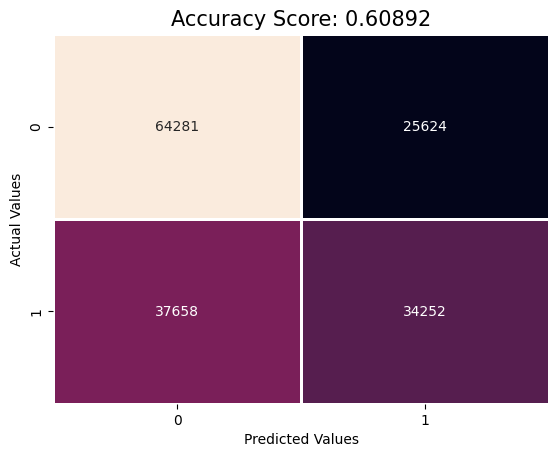

In [144]:
score_dt = round(accuracy_score(y_test, y_pred_dt), 5)
cm_dt = cm(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt=".0f", lw=2, cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_dt), size = 15)
plt.show()

[Text(0.5, 0.9, 'Airline_WN <= 0.5\ngini = 0.494\nsamples = 377568\nvalue = [209214, 168354]'),
 Text(0.25, 0.7, 'Time <= 545.5\ngini = 0.477\nsamples = 311584\nvalue = [189228, 122356]'),
 Text(0.125, 0.5, 'Airline_CO <= 0.5\ngini = 0.395\nsamples = 73078\nvalue = [53264, 19814]'),
 Text(0.0625, 0.3, 'AirportFrom_ORD <= 0.5\ngini = 0.385\nsamples = 69181\nvalue = [51163, 18018]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Length <= 175.5\ngini = 0.497\nsamples = 3897\nvalue = [2101, 1796]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Airline_CO <= 0.5\ngini = 0.49\nsamples = 238506\nvalue = [135964, 102542]'),
 Text(0.3125, 0.3, 'Airline_DL <= 0.5\ngini = 0.488\nsamples = 227654\nvalue = [131681, 95973]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Length <= 122.5\ngini = 0.478\nsamples = 10852\nvalue = [4283, 6569]'),
 Text(0.4

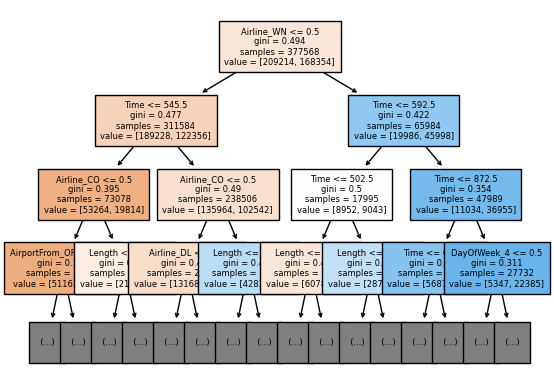

In [145]:
tree.plot_tree(dt, max_depth=3,feature_names = list(X. columns),filled=True, fontsize=6)

In [146]:
print(classification_report(y_test, y_pred_dt, target_names=['Not Delayed', 'Delayed']))

              precision    recall  f1-score   support

 Not Delayed       0.63      0.71      0.67     89905
     Delayed       0.57      0.48      0.52     71910

    accuracy                           0.61    161815
   macro avg       0.60      0.60      0.59    161815
weighted avg       0.60      0.61      0.60    161815



In [147]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

criterias=["gini", "entropy", "log_loss"]
splitters = ["best", "random"]
depth =[4,5,6]
samples_split = [2,3]
samples_leaf =  [1,2]

grid_dt=dict(criterion= criterias, splitter=splitters, max_depth= depth, min_samples_split=samples_split,min_samples_leaf= samples_leaf)
grid_search_dt=GridSearchCV(estimator=dt, param_grid=grid_dt, cv=10, scoring="accuracy",error_score=0)
grid_result_dt=grid_search_dt.fit(X_train, y_train)

In [148]:
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))
means3 = grid_result_dt.cv_results_['mean_test_score']
stds3 = grid_result_dt.cv_results_['std_test_score']
params3 = grid_result_dt.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.641098 using {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.633915 (0.001613) with: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.631367 (0.001668) with: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.633915 (0.001613) with: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.631367 (0.001668) with: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.633915 (0.001613) with: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.631367 (0.001668) with: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
0.633915 (0.001613) with: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf'

In [150]:
# Best: 0.641098 using {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
# samples_split 2 ve 3 değrlerini aldığında farklılık görülmemektedir. 
# max_depth arttıkça sonuçlar iyileşmiştir. 
# splitter için "best" değeri "random" değerine göre daha iyi sonuç vermiştir. 

depth2 =[6,7,8,9]
splitters = ["best"]
samples_split2 = [3,4]
samples_leaf2 =  [1,2,3]
grid_dt2 = dict(criterion= criterias, splitter=splitters, max_depth = depth2, min_samples_split = samples_split2, min_samples_leaf= samples_leaf2)
grid_search_dt2 = GridSearchCV(estimator=dt, param_grid=grid_dt2, cv=10, scoring="accuracy", error_score=0)
grid_result_dt2 = grid_search_dt2.fit(X_train, y_train)

In [151]:
print("Best: %f using %s" % (grid_result_dt2.best_score_, grid_result_dt2.best_params_))
means4 = grid_result_dt2.cv_results_['mean_test_score']
stds4 = grid_result_dt2.cv_results_['std_test_score']
params4 = grid_result_dt2.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.647650 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.641098 (0.001784) with: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.641098 (0.001784) with: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.641098 (0.001790) with: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.641098 (0.001790) with: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'best'}
0.641098 (0.001790) with: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
0.641098 (0.001790) with: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}
0.644128 (0.001960) with: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, '

In [152]:
# Best: 0.647650 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
# max_depth arttıkça sonuç iyileşmiş. 
# samples_split, 3 ya da 4 olması ciddi anlamda bir şey değiştirmemiş fakat az da olsa 3 daha iyi sonuçlar vermiş 
# samples_leaf 1 için daha yüksek sonuçlar vermiş 

depth3 =[9, 12, 15, 18, 25, 30]
samples_split3=[3]
samples_leaf3 =  [1]

grid_dt3 = dict(criterion=criterias, splitter=splitters, max_depth= depth3, min_samples_split=samples_split3,  min_samples_leaf= samples_leaf3)
grid_search_dt3 = GridSearchCV(estimator=dt, param_grid=grid_dt3, cv=10, scoring="accuracy", error_score=0)
grid_result_dt3=grid_search_dt3.fit(X_train, y_train)

In [153]:
print("Best: %f using %s" % (grid_result_dt3.best_score_, grid_result_dt3.best_params_))
means5 = grid_result_dt3.cv_results_['mean_test_score']
stds5 = grid_result_dt3.cv_results_['std_test_score']
params5 = grid_result_dt3.cv_results_['params']
for mean, stdev, param in zip(means5, stds5, params5):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.651615 using {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.647637 (0.002272) with: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.650611 (0.001888) with: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.651615 (0.001699) with: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.650068 (0.002245) with: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.640997 (0.001944) with: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.633878 (0.002211) with: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.647377 (0.002077) with: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_le

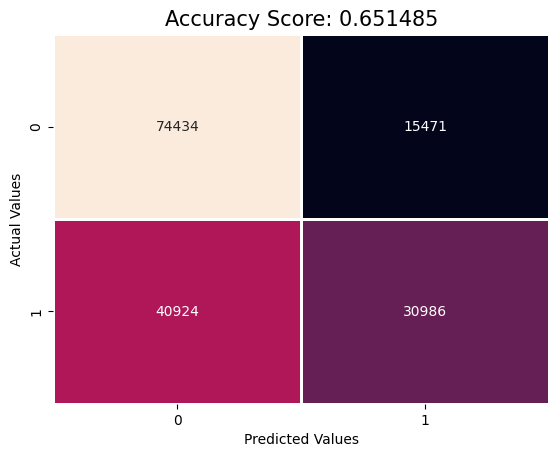

In [191]:
# Best: 0.651615 using {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
y_pred_best_DT = grid_result_dt3.best_estimator_.predict(X_test)
score_best_DT = round(accuracy_score(y_test, y_pred_best_DT), 6)
auc_best_DT = round(roc_auc_score(y_test, y_pred_best_DT), 5)
cm_best_DT = cm(y_test, y_pred_best_DT)
sns.heatmap(cm_best_DT, annot=True, fmt=".0f", lw=2, cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_best_DT), size = 15)
plt.show()

In [155]:
classification_report_best_DT = classification_report(y_test, y_pred_best_DT, target_names=['Not Delayed', 'Delayed'])
print(classification_report_best_DT)

              precision    recall  f1-score   support

 Not Delayed       0.65      0.83      0.73     89905
     Delayed       0.67      0.43      0.52     71910

    accuracy                           0.65    161815
   macro avg       0.66      0.63      0.62    161815
weighted avg       0.65      0.65      0.64    161815



[Text(0.5, 0.9, 'Airline_WN <= 0.5\ngini = 0.494\nsamples = 377568\nvalue = [209214, 168354]'),
 Text(0.25, 0.7, 'Time <= 545.5\ngini = 0.477\nsamples = 311584\nvalue = [189228, 122356]'),
 Text(0.125, 0.5, 'Airline_CO <= 0.5\ngini = 0.395\nsamples = 73078\nvalue = [53264, 19814]'),
 Text(0.0625, 0.3, 'AirportFrom_ORD <= 0.5\ngini = 0.385\nsamples = 69181\nvalue = [51163, 18018]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Length <= 175.5\ngini = 0.497\nsamples = 3897\nvalue = [2101, 1796]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Airline_CO <= 0.5\ngini = 0.49\nsamples = 238506\nvalue = [135964, 102542]'),
 Text(0.3125, 0.3, 'Airline_DL <= 0.5\ngini = 0.488\nsamples = 227654\nvalue = [131681, 95973]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Length <= 122.5\ngini = 0.478\nsamples = 10852\nvalue = [4283, 6569]'),
 Text(0.4

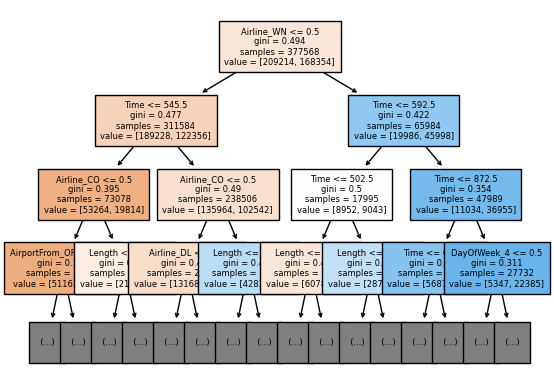

In [156]:
tree.plot_tree(grid_result_dt3.best_estimator_, max_depth=3,feature_names = list(X. columns),filled=True, fontsize=6)

## ENSEMBLE LEARNING

Ensemble learning için farklı yaklaşımları denenmiştir.

In [165]:
estimators=[("rf", grid_result_dt3.best_estimator_), ("lr", grid_result_lr1.best_estimator_)]

### MAX VOTING

class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)

In [189]:
from sklearn.ensemble import VotingClassifier

# voting 
final_model_max_voting = VotingClassifier(estimators= estimators, voting="hard", weights=[0.7, 0.3])
final_model_max_voting.fit(X_train, y_train)
prediction_max_voting = final_model_max_voting.predict(X_test)

# evaluation
accuracy_max_voting = round(accuracy_score(y_test, prediction_max_voting), 5)
auc_max_voting = round(roc_auc_score(y_test, prediction_max_voting), 5)
print(f" Accuracy: {accuracy_max_voting}%")
print(f" AUC score: {auc_max_voting}")

 Accuracy: 65.14847%
 AUC score: 0.62941


In [176]:
# peki voting soft olsaydı nasıl bir sonuç elde edilirdi? 
# Lojistik regresyon ve decision tree sonucunda elde edilen accuracy seviyeleri çok yakın olduğu için "weights" değerleri girilmemiştir.

final_model_max_voting2 = VotingClassifier(estimators= estimators, voting="soft", weights=[0.8, 0.2])
final_model_max_voting2.fit(X_train, y_train)
prediction_max_voting2 = final_model_max_voting.predict(X_test)
accuracy_max_voting2 = round(accuracy_score(y_test, prediction_max_voting), 5)
auc_max_voting2 = round(roc_auc_score(y_test, prediction_max_voting), 5)
print(f" Accuracy: {accuracy_max_voting2}%")
print(f" AUC score: {auc_max_voting2}")


 Accuracy: 64.87717%
 AUC score: 0.61948


### STACKING

In [180]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# building the model
final_model_stacking = GradientBoostingClassifier(random_state=42)

# Stacking Classifier
final_model_stacking= StackingClassifier(estimators=estimators, final_estimator=final_model_stacking)
final_model_stacking.fit(X_train, y_train)
prediction_stacking = final_model_stacking.predict(X_test)

# evaluation
accuracy_stacking = round(accuracy_score(y_test, prediction), 5)
auc_stacking = round(roc_auc_score(y_test, prediction), 5)
print(f" Accuracy: {accuracy_stacking}%")
print(f" AUC score: {auc_stacking}")

 Accuracy: 64.41121%
 AUC score: 0.62758


In [ ]:
# KARŞILAŞTIRMA

In [192]:
comparision = {'Metod': ['decision tree', 'stacking', 'max voting soft', 'max voting hard', 'logistics regression'],
               'accuracy': [score_best_DT, accuracy_stacking/100, accuracy_max_voting2/100, accuracy_max_voting/100, score_best_LR],
               'auc': [auc_best_DT, auc_stacking, auc_max_voting2, auc_max_voting, roc_auc]}


comparision_table = pd.DataFrame(comparision)
print(comparision_table)


                  Metod  accuracy       auc
0         decision tree  0.651485  0.629410
1              stacking  0.644112  0.627580
2       max voting soft  0.648772  0.619480
3       max voting hard  0.651485  0.629410
4  logistics regression  0.643910  0.627373


En iyi sonuç % 65.1485 ile karar ağaçları algoritmasına aittir. 